![](https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png)

# House Prices Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
# from tensorflow.keras.layers.Layer import Sequential, Dense, ReLU
# Попросите покупателя дома описать дом своей мечты, 
# и он, вероятно, не начнет с высоты потолка подвала 
# или близости к железной дороге с востока на запад. 
# Но набор данных этого конкурса игровых площадок доказывает, 
# что гораздо больше влияет на ценовые переговоры, 
# чем количество спален или забор из белого штакетника.

# С 79 независимыми переменными, описывающими (почти) каждый аспект жилых домов в Эймсе, 
# штат Айова, этот конкурс ставит перед вами задачу предсказать окончательную цену каждого дома.

# Читаем и изучаем полученные данные

**Читаем данные и обрезаем Id столбец, он не нужен для обучения** 

In [2]:
data_train = pd.read_csv(r'train.csv')
data_train = data_train.drop('Id', axis=1)

**Выводим первые пять строк**

In [3]:
data_train.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

**Необходимо произвести поиск и заполнение отсутствующих значений**

Я использовал функцию участника соревнования Kaggle https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition

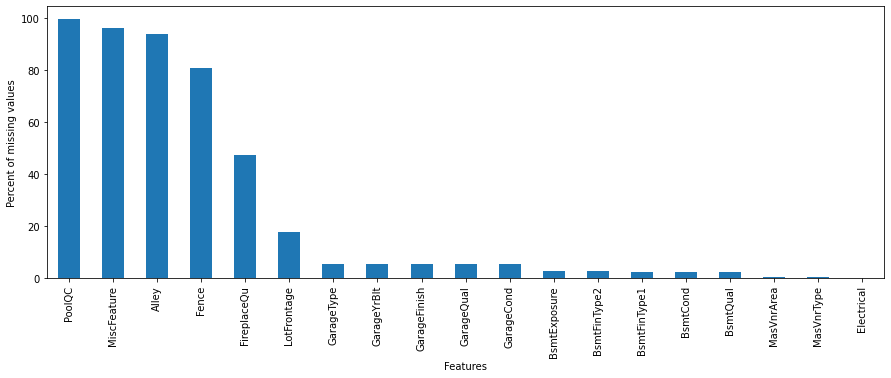

Процент пропущенных значений в столбцах
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [4]:
missing = (round(data_train.isnull().mean()*100,10)) 
missing = missing[missing>0].sort_values(ascending=False)
plt.figure(figsize=(15,5))
missing.plot.bar()
# plt.axis("Percent of missing values")
plt.ylabel("Percent of missing values")
plt.xlabel("Features")
plt.show()
print('Процент пропущенных значений в столбцах')
print(missing)

**Проверяем типы данных в которых отсутствую значения**

In [5]:
for i in missing.index:
    print(i, data_train[i].dtype)

PoolQC object
MiscFeature object
Alley object
Fence object
FireplaceQu object
LotFrontage float64
GarageType object
GarageYrBlt float64
GarageFinish object
GarageQual object
GarageCond object
BsmtExposure object
BsmtFinType2 object
BsmtFinType1 object
BsmtCond object
BsmtQual object
MasVnrArea float64
MasVnrType object
Electrical object


Теоретически, можно вычислить значения которые пропущены и восстановить их. Изучим на основе цены и значений какими могут быть пропущенные значения.

1.PoolQC - качество бассейна

In [6]:
data_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Мы видим, что имеется 3 класса Хорошо, прекрасно и средне. Но также имеется еще одна графа PoolArea, отображающая площадь бассейна, соответственно если данное значение равно нулю, то можно вместо значения в графе PollQC NaN заменить на None.

In [7]:
data_train['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [8]:
data_train['PoolQC'] = data_train['PoolQC'].fillna(value = 'None')

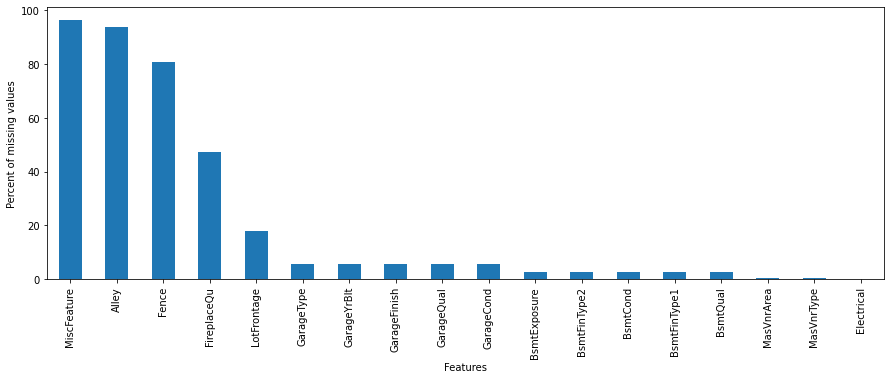

Процент пропущенных значений в столбцах
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [9]:
missing = (round(data_train.isnull().mean()*100,10)) 
missing = missing[missing>0].sort_values(ascending=False)
plt.figure(figsize=(15,5))
missing.plot.bar()
# plt.axis("Percent of missing values")
plt.ylabel("Percent of missing values")
plt.xlabel("Features")
plt.show()
print('Процент пропущенных значений в столбцах')
print(missing)

Как видно, одно значение было заменено

2. MiscFeature

In [10]:
data_train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

Shed - сарай

Gar2 - Второй гараж



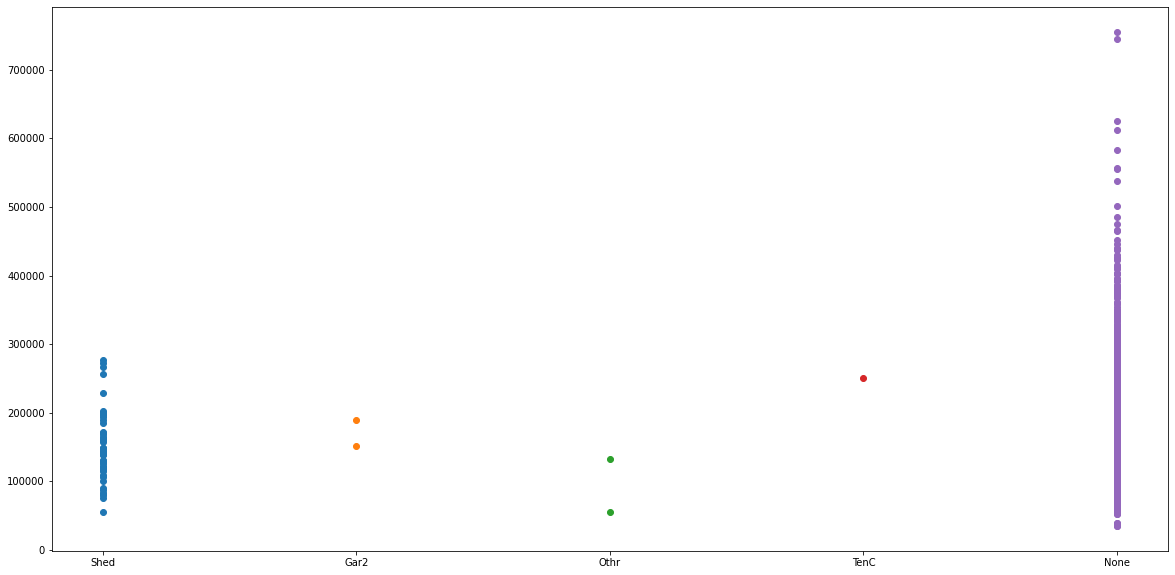

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(data_train[data_train['MiscFeature'] == 'Shed']['MiscFeature'],data_train[data_train['MiscFeature'] == 'Shed']['SalePrice'])
plt.scatter(data_train[data_train['MiscFeature'] == 'Gar2']['MiscFeature'],data_train[data_train['MiscFeature'] == 'Gar2']['SalePrice'])
plt.scatter(data_train[data_train['MiscFeature'] == 'Othr']['MiscFeature'],data_train[data_train['MiscFeature'] == 'Othr']['SalePrice'])
plt.scatter(data_train[data_train['MiscFeature'] == 'TenC']['MiscFeature'],data_train[data_train['MiscFeature'] == 'TenC']['SalePrice'])
plt.scatter(data_train[data_train['MiscFeature'].isna() == True]['MiscFeature'].fillna(value = 'None'), data_train[data_train['MiscFeature'].isna() == True]['SalePrice'])
plt.show()


**Описание наименований столбцов**
- SalePrice: цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
- MSSubClass: класс здания
- MSZoning: Общая классификация зонирования
- LotFrontage: Линейные футы улицы, соединенной с недвижимостью
- LotArea: Размер участка в квадратных футах.
- Улица: Тип подъездной дороги
- Аллея: Тип доступа к аллее
- LotShape: Общий вид недвижимости
- LandContour: Плоскостность объекта
- Утилиты: Тип доступных утилит
- LotConfig: конфигурация лота
- LandSlope: уклон участка
- Окрестности: физические местоположения в черте города Эймс.
- Условие 1: Близость к главной дороге или железной дороге
- Условие 2: близость к главной дороге или железной дороге (при наличии второй)
- BldgType: Тип жилья
- HouseStyle: стиль жилья
- Общее качество: общее качество материала и отделки.
- TotalCond: общая оценка состояния
- Год постройки: Первоначальная дата постройки
- YearRemodAdd: дата переделки
- RoofStyle: тип крыши
- RoofMatl: Материал крыши
- Exterior1st: Внешнее покрытие дома
- Exterior2nd: Внешнее покрытие дома (если более одного материала)
- MasVnrType: Тип каменной кладки
- MasVnrArea: Площадь каменной кладки в квадратных футах.
- ExterQual: качество материалов экстерьера
- ExterCond: Текущее состояние материала снаружи.
- Фундамент: Тип фундамента
- BsmtQual: Высота подвала
- BsmtCond: Общее состояние подвала
- BsmtExposure: Стены подвала на уровне выхода или сада.
- BsmtFinType1: Качество отделки цокольного этажа
- BsmtFinSF1: тип 1 с отделкой в квадратных футах
- BsmtFinType2: Качество второй обработанной области (если присутствует)
- BsmtFinSF2: тип 2 с отделкой в квадратных футах
- BsmtUnfSF: Незавершенные квадратные футы цокольного этажа.
- TotalBsmtSF: Общая площадь подвала в квадратных футах.
- Отопление: Тип отопления
- ОтоплениеQC: Качество и состояние отопления
- CentralAir: центральное кондиционирование
- Электрика: Электрическая система
- 1stFlrSF: квадратные футы первого этажа
- 2ndFlrSF: Квадратные футы второго этажа.
- LowQualFinSF: квадратные футы с отделкой низкого качества (все этажи)
- GrLivArea: жилая площадь над землей в квадратных футах
- BsmtFullBath: Ванные комнаты в подвале
- BsmtHalfBath: Половина ванных комнат в подвале
- FullBath: полностью оборудованные ванные комнаты выше уровня земли.
- HalfBath: полуванны выше уровня
- Спальня: Количество спален выше цокольного этажа
- Кухня: Количество кухонь
- KitchenQual: Качество кухни
- TotRmsAbvGrd: Общее количество комнат выше класса (не включая ванные комнаты)
- Функциональность: рейтинг домашней функциональности
- Камины: Количество каминов
- FireplaceQu: качество камина
- GarageType: Место в гараже
- GarageYrBlt: Год постройки гаража.
- GarageFinish: Внутренняя отделка гаража
- GarageCars: Размер гаража по вместимости автомобиля
- GarageArea: Размер гаража в квадратных футах.
- GarageQual: качество гаража
- GarageCond: Гаражное состояние
- PavedDrive: Асфальтированная дорога
- WoodDeckSF: площадь деревянной палубы в квадратных футах.
- OpenPorchSF: площадь открытого крыльца в квадратных футах.
- EnclosedPorch: закрытая площадь крыльца в квадратных футах.
- 3SsnPorch: площадь крыльца для трех сезонов в квадратных футах.
- ScreenPorch: Площадь крыльца в квадратных футах.
- PoolArea: Площадь бассейна в квадратных футах.
- PoolQC: качество пула
- Забор: Качество забора
- MiscFeature: Разная функция, не включенная в другие категории.
- MiscVal: Значение различных функций
- MoSold: месяц продажи
- Год продажи: Год продажи
- SaleType: Тип продажи
- Состояние продажи: Состояние продажи

**Проверяем наличие отсутствующих значений в столбце SalePrice**

In [8]:
data_train['SalePrice'].isnull().value_counts()

False    1460
Name: SalePrice, dtype: int64

Как можно видеть, в столбце цены отсутствуют пропущенные значения.

**Строим диаграмму распределений исходного датасета и проводим описание данных**

Рисунок № 1. Диаграмма распределений значений цены

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


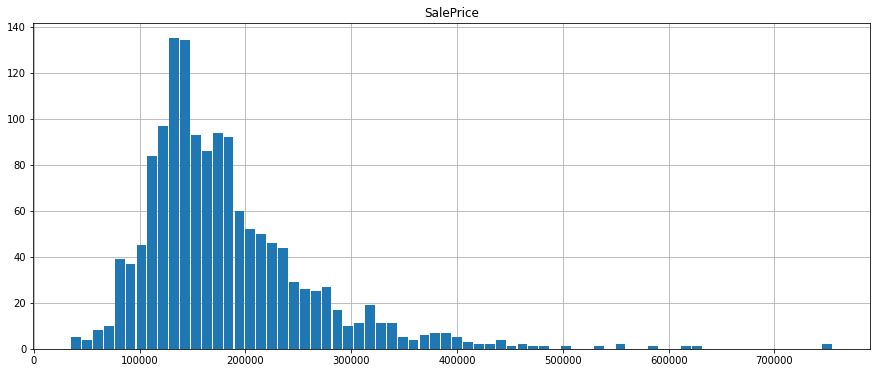

In [9]:
data_train.hist(column = 'SalePrice', bins = 70,figsize=(15,6), zorder=2, rwidth=0.9)
print(data_train['SalePrice'].describe())

**Строим диаграмму размаха цены исходного датасета**

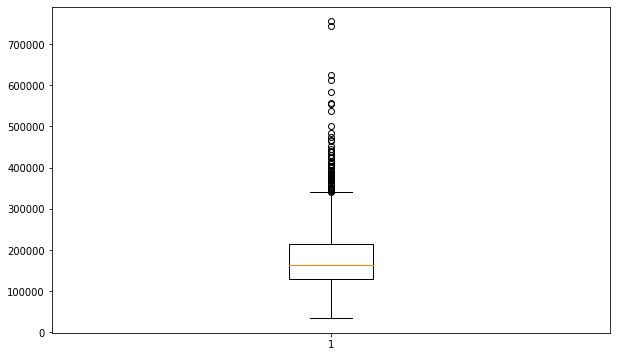

In [10]:
plt.figure(figsize=(10,6))
plt.boxplot(x=data_train['SalePrice'])
plt.show()

**Строим диаграмму рассеивания**

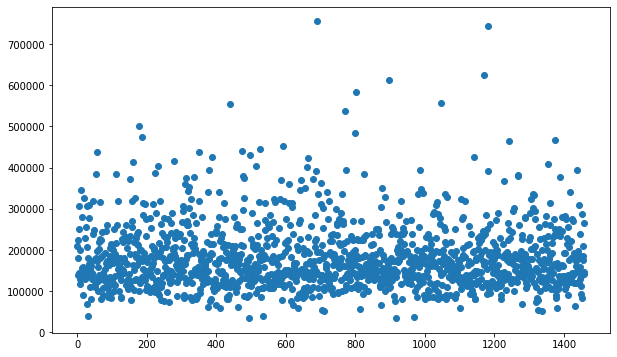

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
plt.show()

**Определяем типы данных присутствующие в датасете**

In [12]:
print('В датафрейме содержатся типы данных: ', data_train.dtypes.unique())
print('Количество столбцов типа int64: ', data_train.dtypes[data_train.dtypes == 'int64'].count())
print('Количество столбцов типа objects (O) : ', data_train.dtypes[data_train.dtypes == 'O'].count())
print('Количество столбцов типа float64 : ', data_train.dtypes[data_train.dtypes == 'float64'].count())

В датафрейме содержатся типы данных:  [dtype('int64') dtype('O') dtype('float64')]
Количество столбцов типа int64:  34
Количество столбцов типа objects (O) :  43
Количество столбцов типа float64 :  3


**Преобразование катигориальных данных в цифровые**

В связи с тем, что имы имеем катигориальные данные, а нейронные сети работают с цифрами, необходимо произвести их преобразование

In [41]:
# Функция преобразования категориальных значений в цифровые
def ConvertCatToNum(data):
    data_ = data
    if(data.dtypes[data.dtypes == 'O'].count() == 0):
        return data
    if(data.dtypes[data.dtypes == 'O'].count() > 0):
        index = data.dtypes[data.dtypes == 'O'].index.tolist()
        for i in index:
#             futurs = 
#             futurs = pd.get_dummies(data[i]).reset_index(drop=True)
            data_ = pd.concat([data_,
                   pd.get_dummies(data_[i], prefix = i).reset_index(drop=True)],
                  axis = 1)
            data_ = data_.drop(i,axis=1)
        return data_

In [42]:
data_train = ConvertCatToNum(data_train)

На выходе мы получаем преобразованные катигориальные данные, добавленные к существующему датфрейму и удаленные столбцы катигориальных данных.

**Проверяем сохранность количества строк**

In [45]:
data_train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

Как можно увидеть, количество строк совпадает

**Проверяем на наличие столбцов с типом object**

In [16]:
print('В датафрейме содержатся типы данных: ', data_train.dtypes.unique())

В датафрейме содержатся типы данных:  [dtype('int64') dtype('float64') dtype('uint8')]


В датафрейме отсутствуют типы данных object

**Проверяем наличие отсутствующих значений**

In [52]:
data_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

**Проверяем корреляцию между выходной переменной и входными (измерение влияния факторов на выходную переменную)**

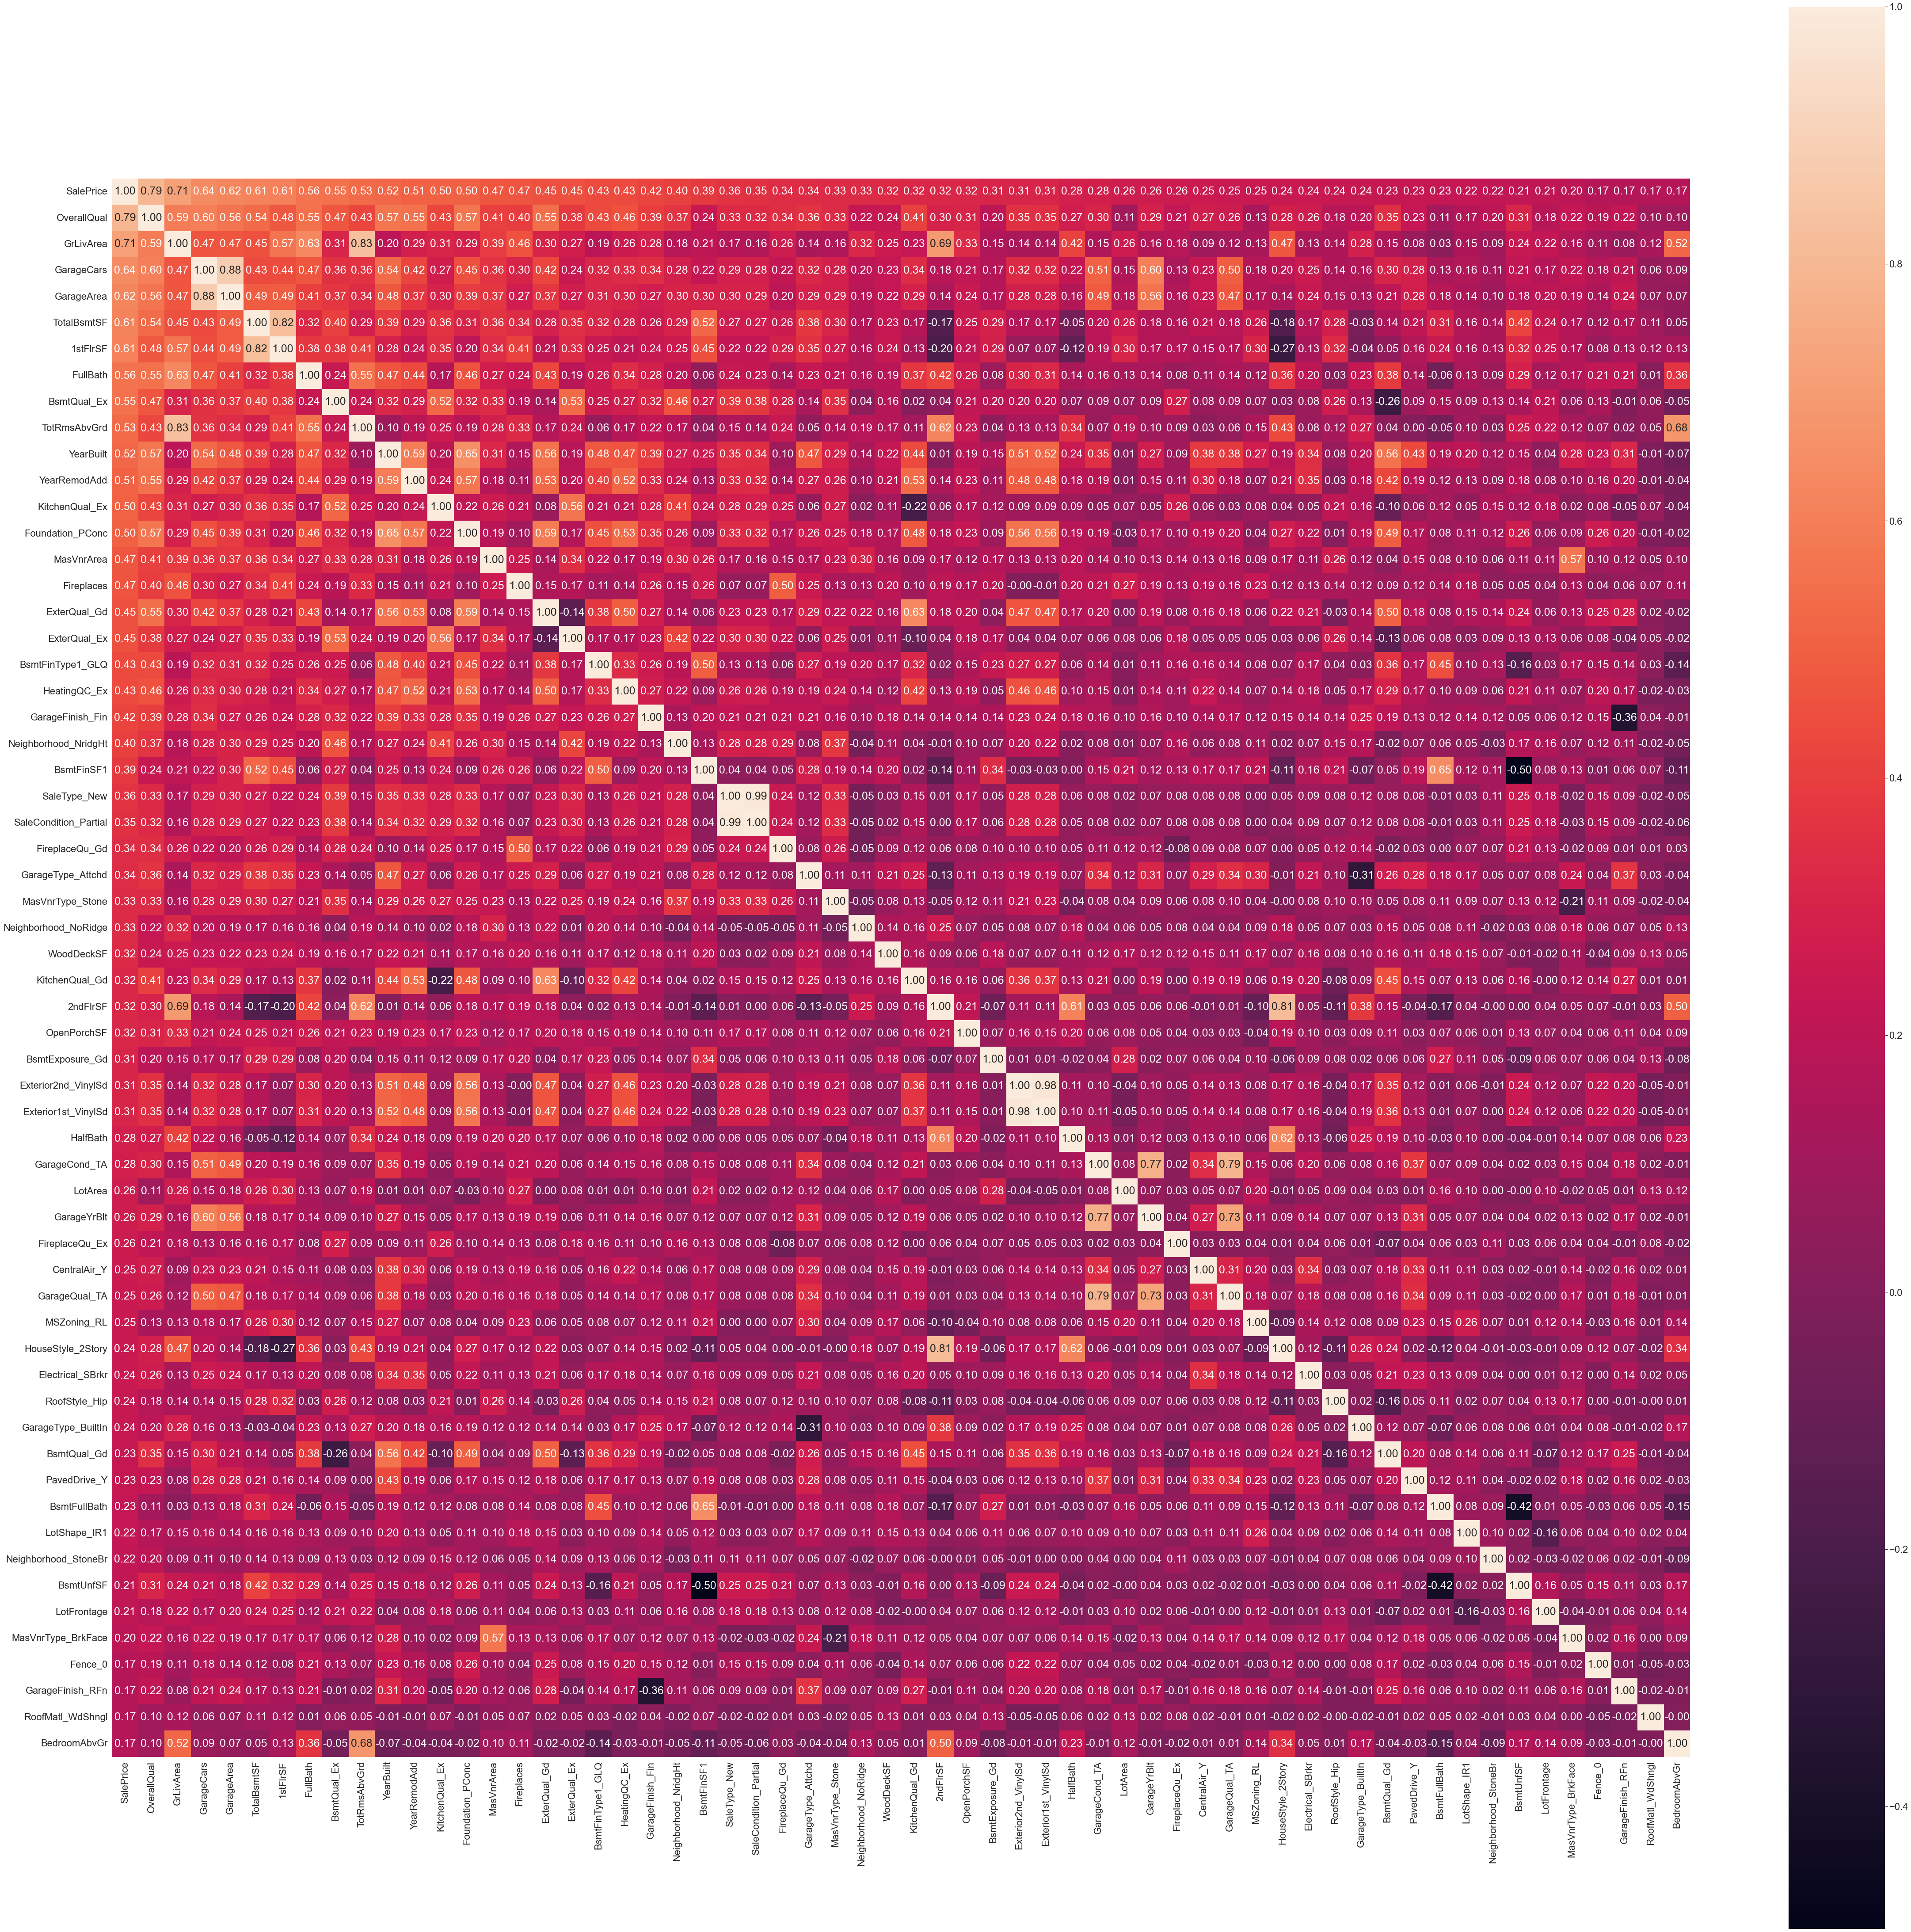

In [149]:
corrmat = data_train.corr()
k = 60 # количество коррелирующих признаков, которое мы хотим увидеть
corrmat.nlargest(k, 'SalePrice').index #Отображаем столбцы максимальной корреляции по возрастанию
cols = corrmat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(data_train[cols].values.T)
plt.figure(figsize=(k+20,k+20))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 25}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Строим графики расределений максимально коррелиремых значений с ценой, а также диаграмму размаха для каждого значения**

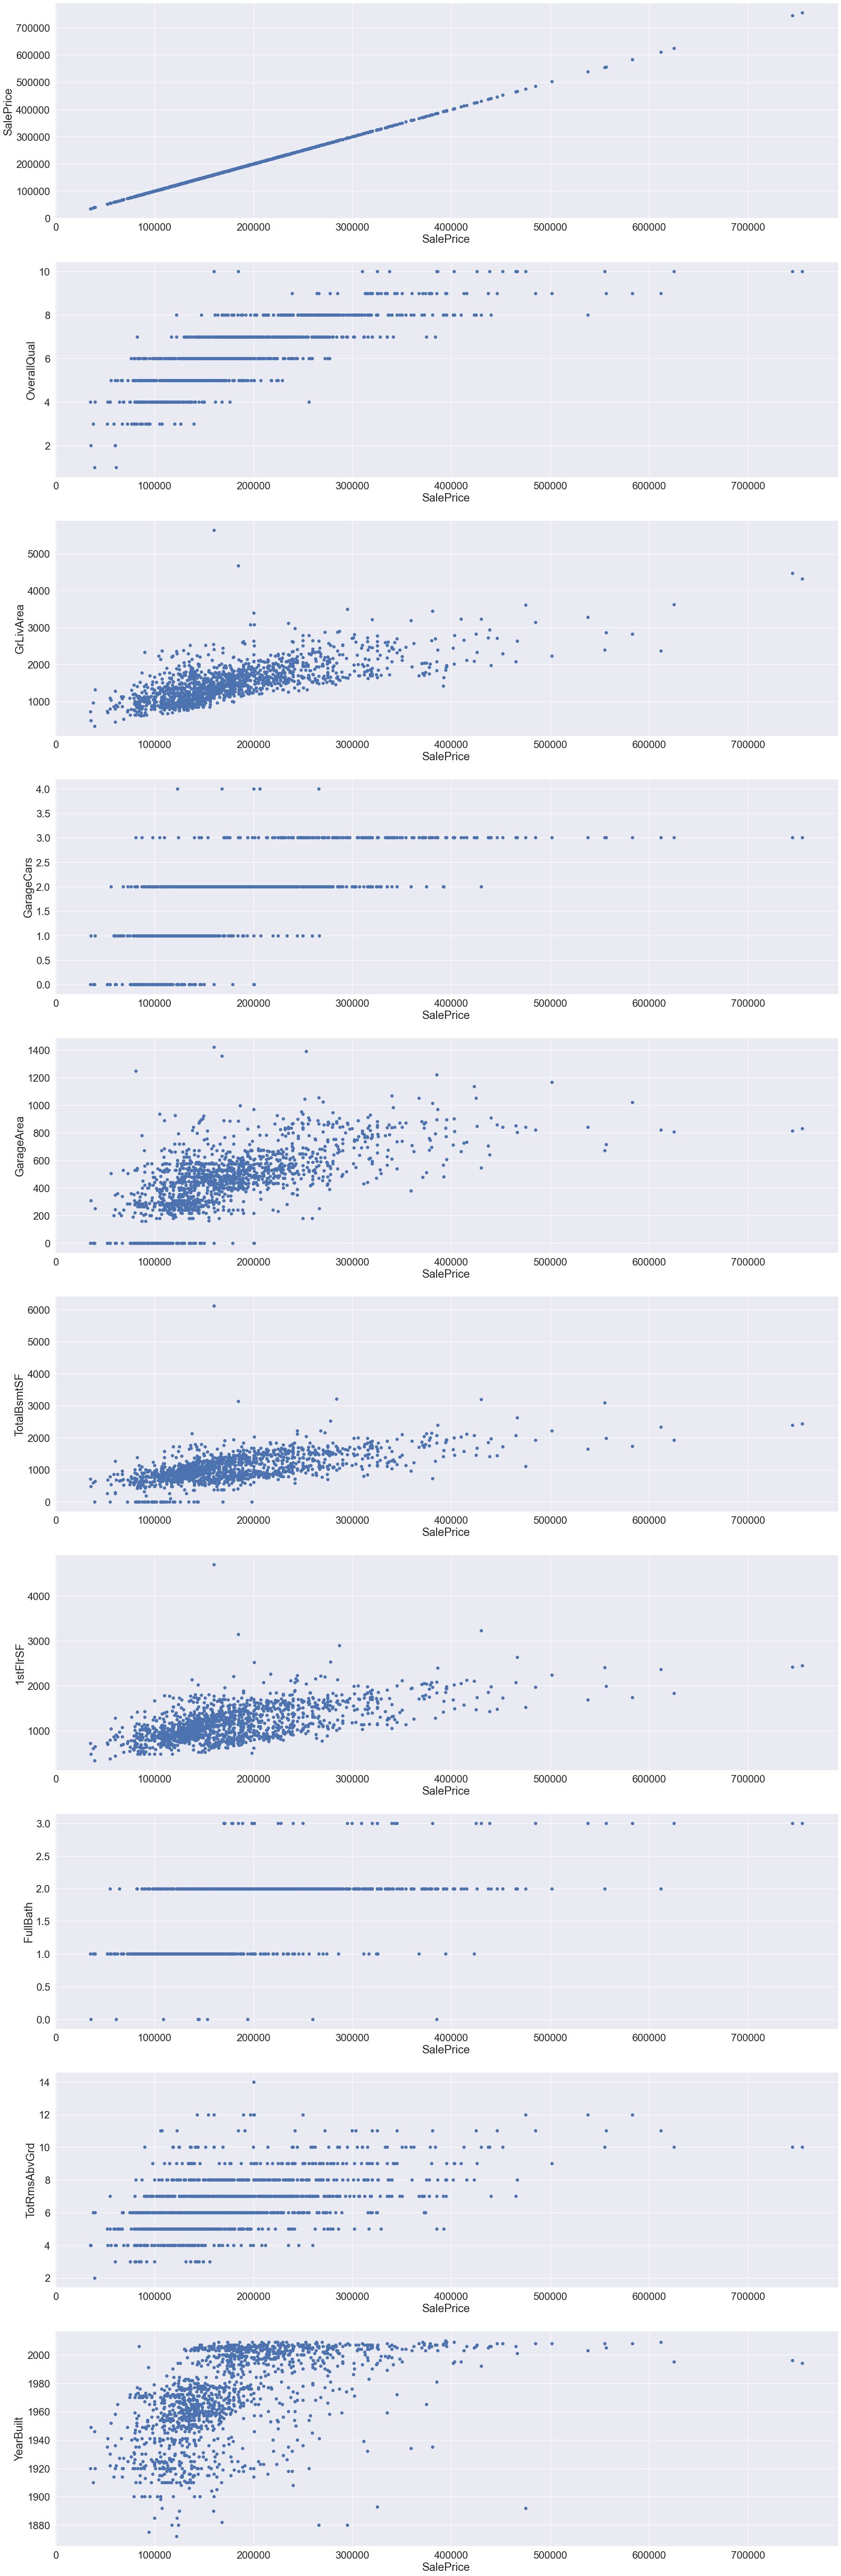

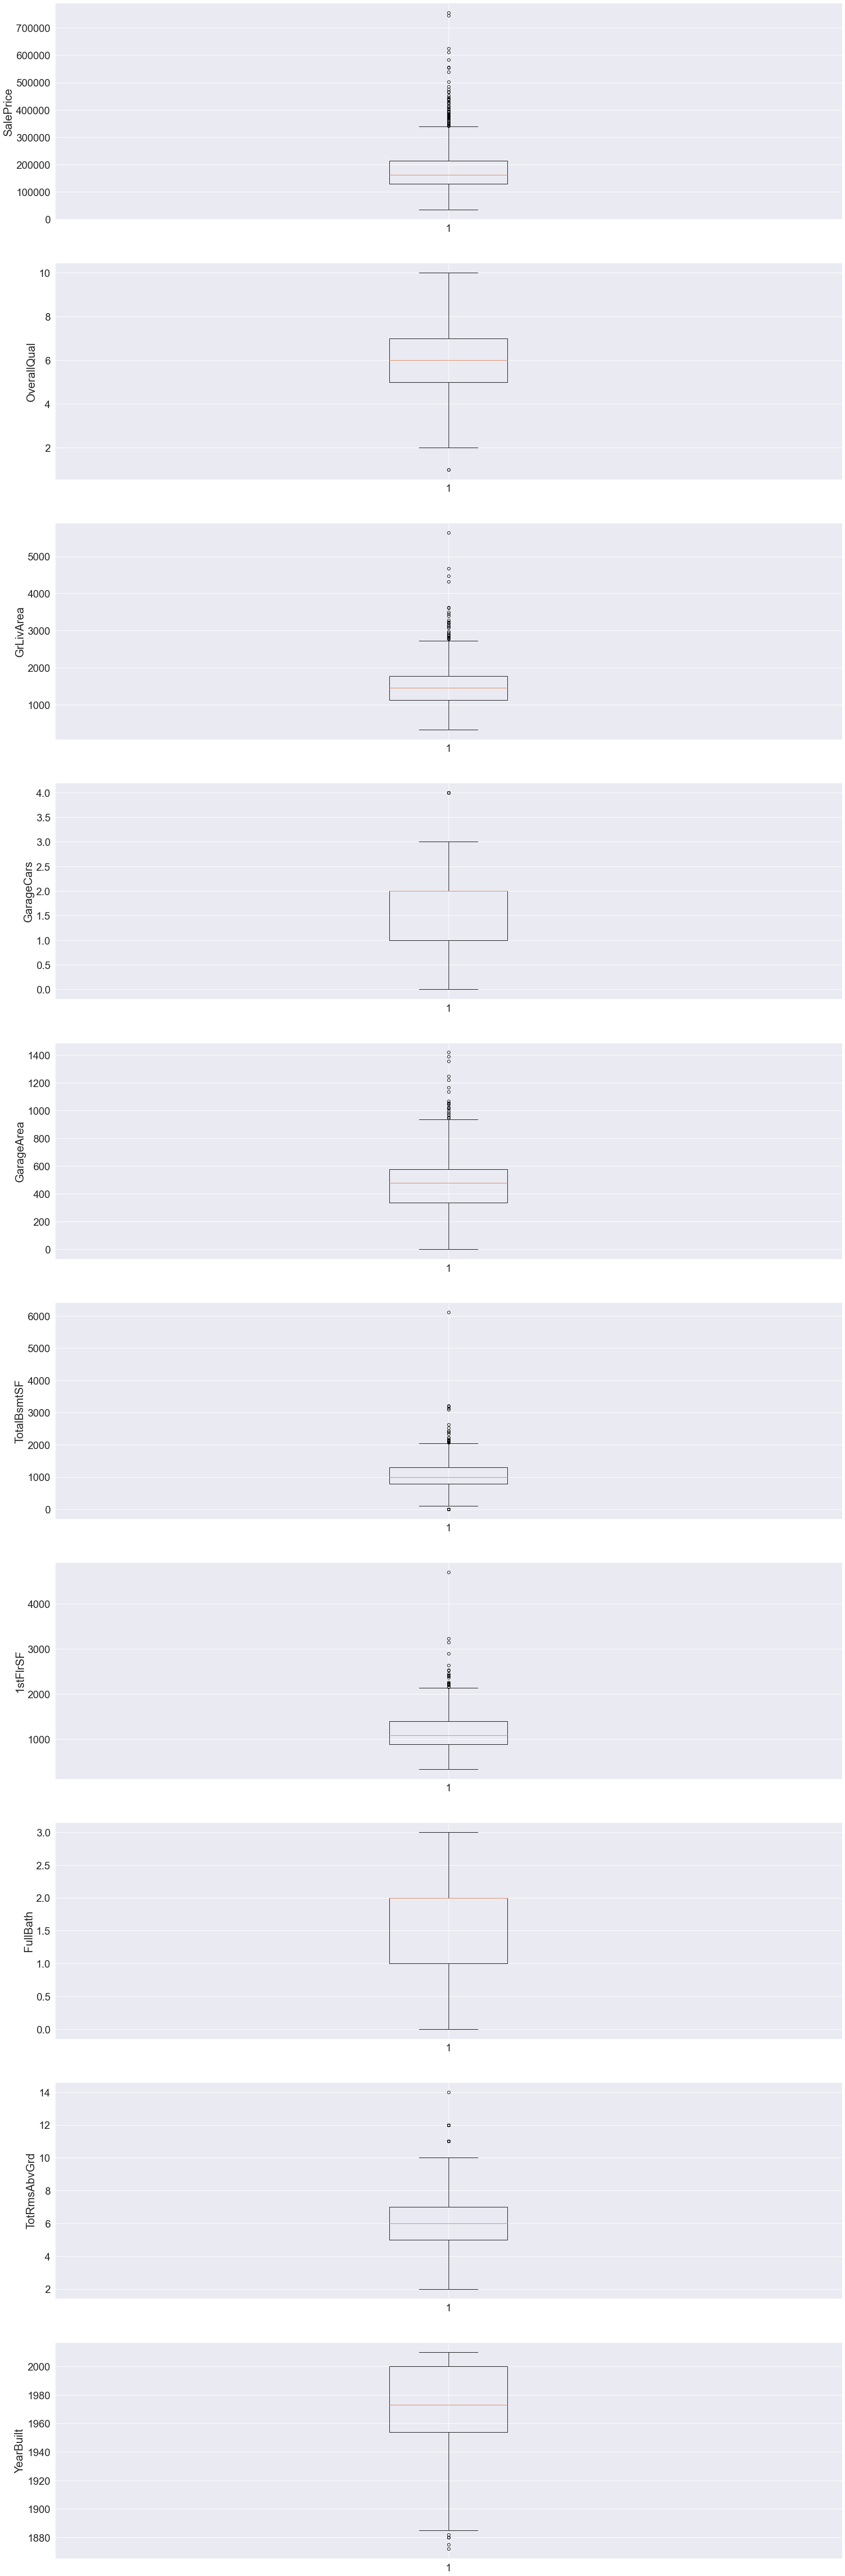

In [11]:
fig, axs = plt.subplots(nrows = len(corrmat.nlargest(k, 'SalePrice').index)  , ncols= 1 ,figsize=(30,100))
for ctn, i in enumerate(corrmat.nlargest(k, 'SalePrice').index):
    axs[ctn].scatter(data_train['SalePrice'], data_train[i])
    axs[ctn].set_xlabel('SalePrice')
    axs[ctn].set_ylabel(i)

fig_1, axs_1 = plt.subplots(nrows = len(corrmat.nlargest(k, 'SalePrice').index)  , ncols= 1 ,figsize=(30,100))
for ctn, i in enumerate(corrmat.nlargest(k, 'SalePrice').index):
    axs_1[ctn].boxplot(data_train[i])
    axs_1[ctn].set_ylabel(i)

plt.show()

Можно наблюдать, что данные имеют большое количество выбросов. Соответстенно необходимо реализовать их фильтрацию, обратившись к рисунку № 1, можно заметить, что распределение имеет не симметричные хвосты, соответственно мы не може применять **метод стандартного отклонения**. По этому было принято решение использовать **Метод интерквартильных расстояний**.
Для реализации данного метода, нам необходимо найти первый (Q1) и третий (Q3) квартил, и на основе них найти "экстримальные" значения по формулам: Limmax = Q3 + Ni х IQR; Limmin = Q1 - Ni х IQR; где Q3 - третий квартиль, Q1 - первый квартиль, IQR - интерквартильное расстояние определяемое по формуле IQR = Q3 - Q1; Ni - заданное число интерквартильного размаха (1.5).

**Производим метод интерквартильных расстояний и фильтруем данные**

In [12]:
# for ctr, i in enumerate(data_train[corrmat.nlargest(k, 'SalePrice').index.drop('SalePrice')].columns):
#     Q1 = q1(data_train[i])
#     Q3 = q3(data_train[i])
#     IQR = Q3 - Q1
#     min_ = Q1 - 1.5 * IQR
#     max_ = Q3 + 1.5 * IQR
#     data_train.hist(column = i, bins = 10,figsize=(15,6), zorder=2, rwidth=0.9)
# #     data_train = data_train.drop(data_train[((data_train[i] > min_) & (data_train[i] < max_))].index)
#     print(i, '-' , 'Q1: ',Q1, ';', 'Q3: ', Q3,';', 'IQR:', IQR, ';' ,'min:', abs(Q1 - 1.5*IQR),'max:', abs(Q3 + 1.5*IQR))



**Ручная подготовка данных**

Очистка SalePrice

In [19]:
#Функция рассчета первого квартиля
def q1(x):
    return np.quantile(x, 0.25 )
#Функция рассчета второго квартиля
def q3(x):
    return np.quantile(x, 0.75)

Q1 = q1(data_train['SalePrice'])
Q3 = q3(data_train['SalePrice'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('SalePrice Q1', Q1)
print('SalePrice Q3', Q3)
print('SalePrice IQR', IQR)
print('SalePrice min', min_)
print('SalePrice max', max_)
# data_train = data_train.drop(data_train[((data_train['SalePrice'] > min_) & (data_train['SalePrice'] < max_))].index)



SalePrice Q1 128000.0
SalePrice Q3 197000.0
SalePrice IQR 69000.0
SalePrice min 24500.0
SalePrice max 300500.0


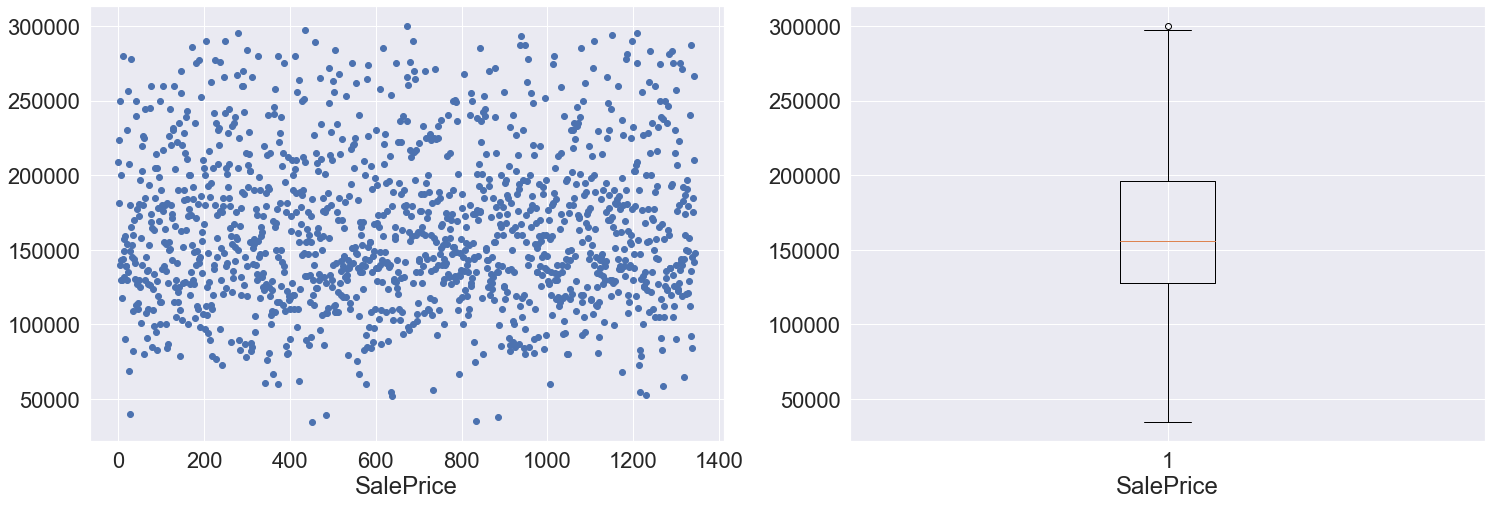

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1345 rows x 80 columns]

In [20]:
data_train = data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])
fig, aix = plt.subplots(nrows = 1, ncols = 2 ,figsize=(25,8))

aix[0].scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
aix[1].boxplot(data_train['SalePrice'])
aix[0].set_xlabel('SalePrice')
aix[1].set_xlabel('SalePrice')
plt.show()
data_train

In [ ]:
ссс

Очистка OverallQual

In [21]:
Q1 = q1(data_train['OverallQual'])
Q3 = q3(data_train['OverallQual'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('OverallQual Q1', Q1)
print('OverallQual Q3', Q3)
print('OverallQual IQR', IQR)
print('OverallQual min', min_)
print('OverallQual max', max_)

OverallQual Q1 5.0
OverallQual Q3 7.0
OverallQual IQR 2.0
OverallQual min 2.0
OverallQual max 10.0


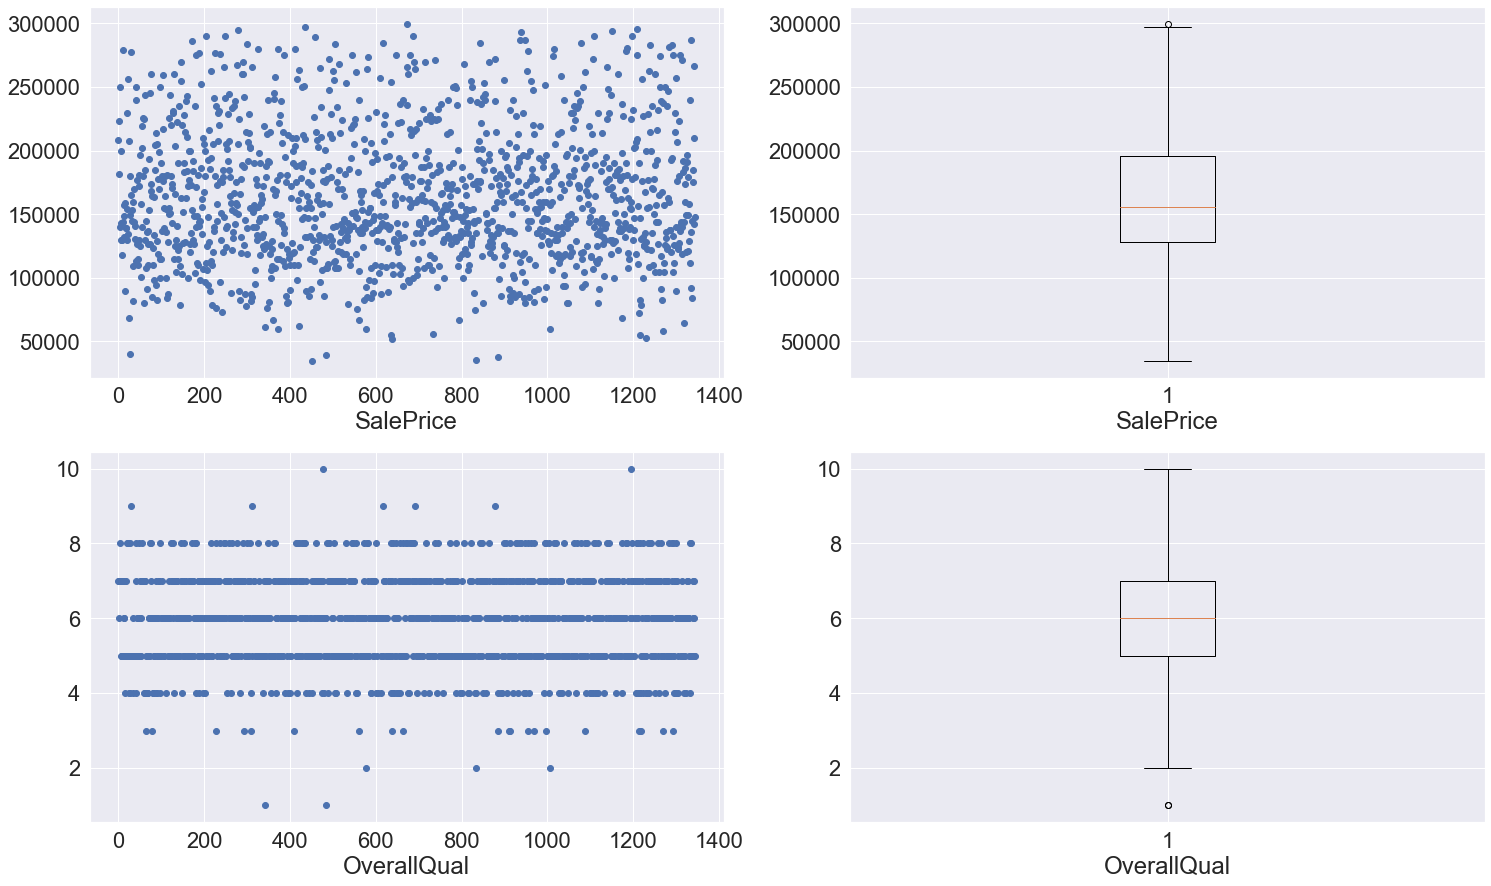

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1345 rows x 80 columns]

In [22]:
data_train = data_train.drop(data_train[((max_ < data_train['OverallQual'])) & ((data_train['OverallQual'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])
fig, aix = plt.subplots(nrows = 2, ncols = 2 ,figsize=(25,15))

aix[0,0].scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
aix[0,0].set_xlabel('SalePrice')
aix[0,1].boxplot(data_train['SalePrice'])
aix[0,1].set_xlabel('SalePrice')



aix[1,0].scatter(x = list(range(data_train['OverallQual'].size)),
                       y = data_train['OverallQual'].tolist())
aix[1,0].set_xlabel('OverallQual')
aix[1,1].boxplot(data_train['OverallQual'])
aix[1,1].set_xlabel('OverallQual')
plt.show()
data_train

Очистка GrLivArea

In [23]:
Q1 = q1(data_train['GrLivArea'])
Q3 = q3(data_train['GrLivArea'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('GrLivArea Q1', Q1)
print('GrLivArea Q3', Q3)
print('GrLivArea IQR', IQR)
print('GrLivArea min', min_)
print('GrLivArea max', max_)

GrLivArea Q1 1110.0
GrLivArea Q3 1708.0
GrLivArea IQR 598.0
GrLivArea min 213.0
GrLivArea max 2605.0


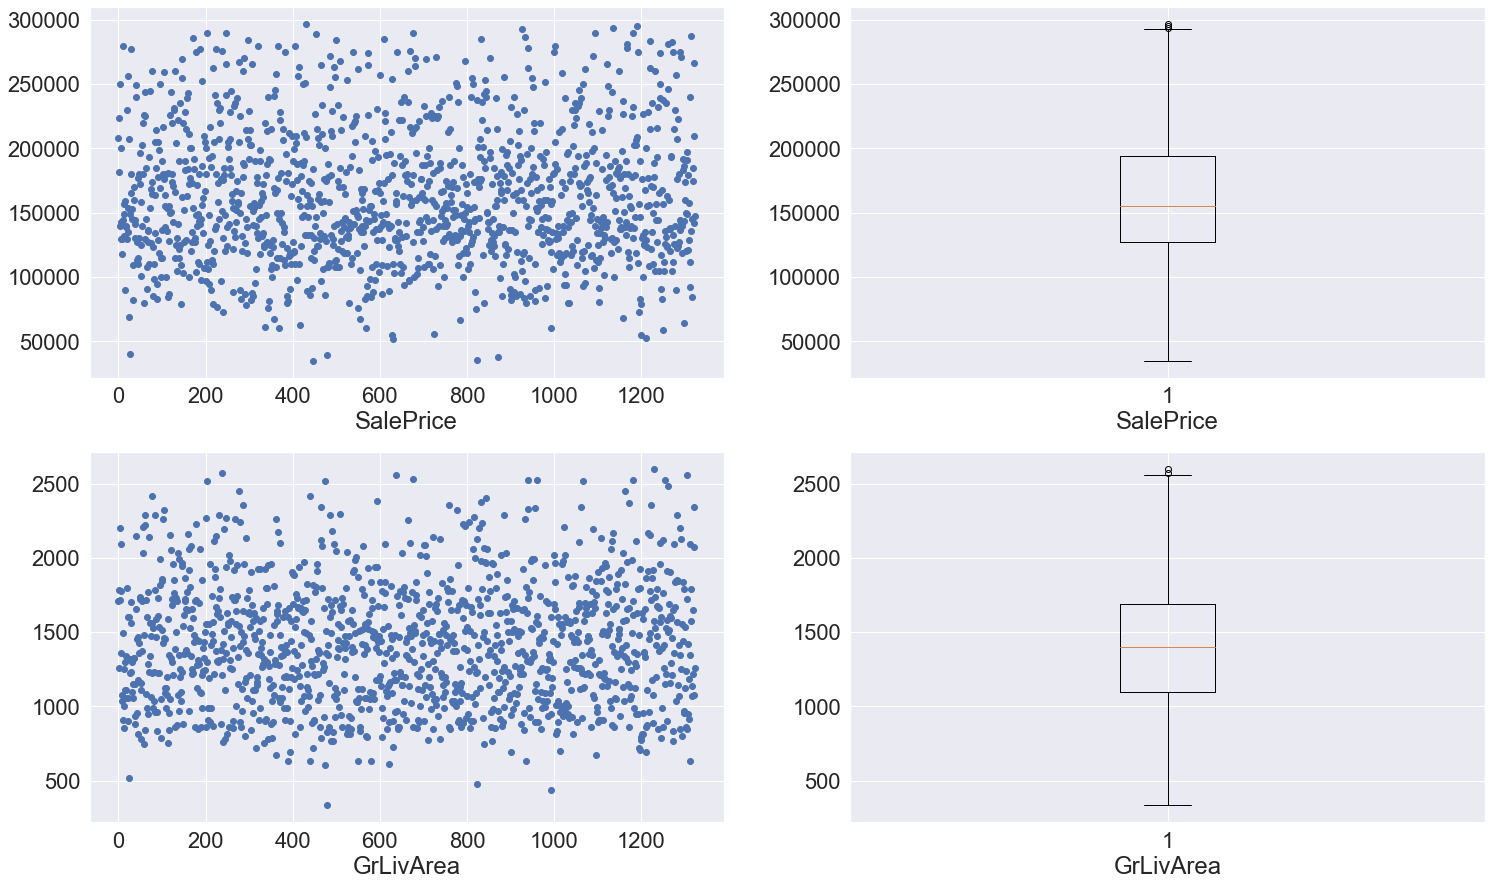

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1324 rows x 80 columns]

In [24]:
data_train = data_train.drop(data_train[((max_ < data_train['GrLivArea'])) & ((data_train['GrLivArea'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])
fig, aix = plt.subplots(nrows = 2, ncols = 2 ,figsize=(25,15))

aix[0,0].scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
aix[0,0].set_xlabel('SalePrice')
aix[0,1].boxplot(data_train['SalePrice'])
aix[0,1].set_xlabel('SalePrice')



aix[1,0].scatter(x = list(range(data_train['GrLivArea'].size)),
                       y = data_train['GrLivArea'].tolist())
aix[1,0].set_xlabel('GrLivArea')
aix[1,1].boxplot(data_train['GrLivArea'])
aix[1,1].set_xlabel('GrLivArea')
plt.show()
data_train

Очистка GarageCars

In [25]:
# list(data_train[corrmat.nlargest(k, 'SalePrice').index].columns)

In [26]:
Q1 = q1(data_train['GarageCars'])
Q3 = q3(data_train['GarageCars'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('GrLivArea Q1', Q1)
print('GrLivArea Q3', Q3)
print('GrLivArea IQR', IQR)
print('GrLivArea min', min_)
print('GrLivArea max', max_)

GrLivArea Q1 1.0
GrLivArea Q3 2.0
GrLivArea IQR 1.0
GrLivArea min -0.5
GrLivArea max 3.5


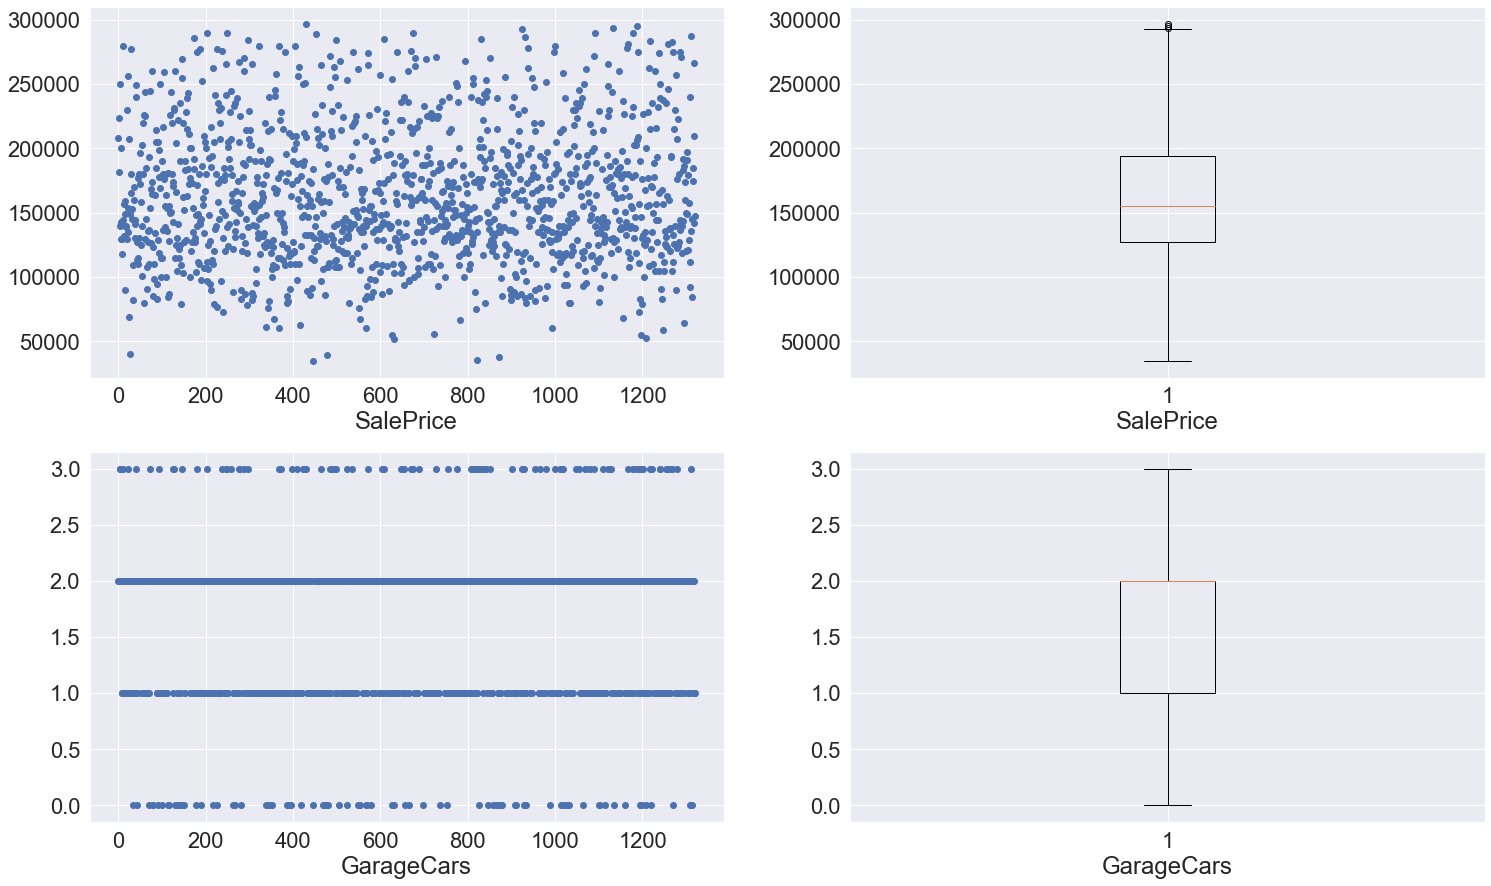

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1321 rows x 80 columns]

In [27]:
data_train = data_train.drop(data_train[((max_ < data_train['GarageCars'])) & ((data_train['GarageCars'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])
fig, aix = plt.subplots(nrows = 2, ncols = 2 ,figsize=(25,15))

aix[0,0].scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
aix[0,0].set_xlabel('SalePrice')
aix[0,1].boxplot(data_train['SalePrice'])
aix[0,1].set_xlabel('SalePrice')



aix[1,0].scatter(x = list(range(data_train['GarageCars'].size)),
                       y = data_train['GarageCars'].tolist())
aix[1,0].set_xlabel('GarageCars')
aix[1,1].boxplot(data_train['GarageCars'])
aix[1,1].set_xlabel('GarageCars')
plt.show()
data_train

Очистка GarageArea

In [28]:
Q1 = q1(data_train['GarageArea'])
Q3 = q3(data_train['GarageArea'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('GarageArea Q1', Q1)
print('GarageArea Q3', Q3)
print('GarageArea IQR', IQR)
print('GarageArea min', min_)
print('GarageArea max', max_)

GarageArea Q1 308.0
GarageArea Q3 551.0
GarageArea IQR 243.0
GarageArea min -56.5
GarageArea max 915.5


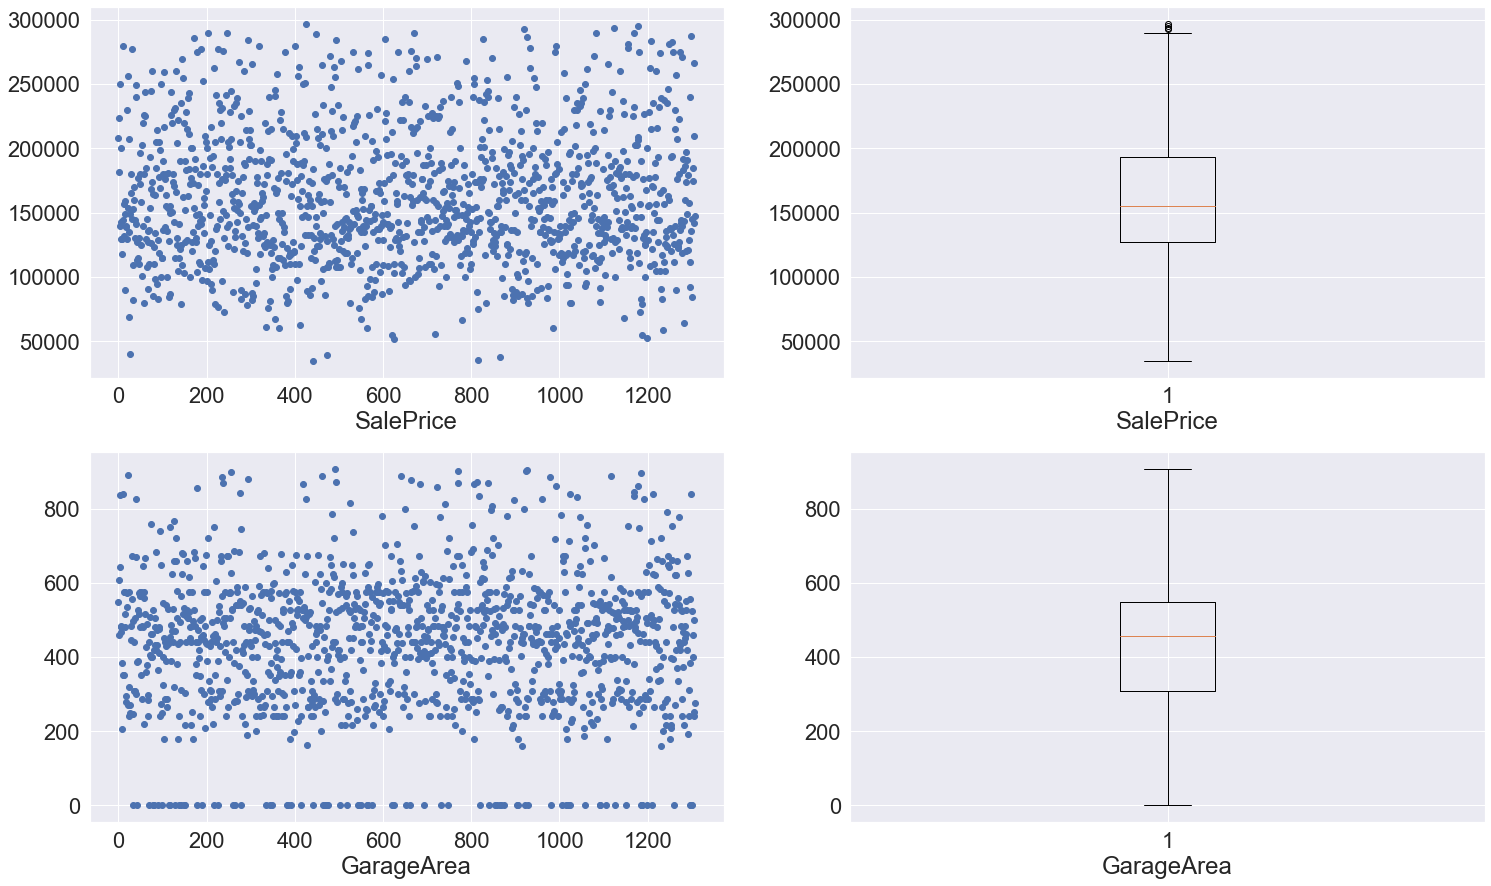

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1308 rows x 80 columns]

In [29]:
data_train = data_train.drop(data_train[((max_ < data_train['GarageArea'])) & ((data_train['GarageArea'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])
fig, aix = plt.subplots(nrows = 2, ncols = 2 ,figsize=(25,15))

aix[0,0].scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
aix[0,0].set_xlabel('SalePrice')
aix[0,1].boxplot(data_train['SalePrice'])
aix[0,1].set_xlabel('SalePrice')



aix[1,0].scatter(x = list(range(data_train['GarageArea'].size)),
                       y = data_train['GarageArea'].tolist())
aix[1,0].set_xlabel('GarageArea')
aix[1,1].boxplot(data_train['GarageArea'])
aix[1,1].set_xlabel('GarageArea')
plt.show()
data_train

Очистка TotalBsmtSF

In [30]:
Q1 = q1(data_train['TotalBsmtSF'])
Q3 = q3(data_train['TotalBsmtSF'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('TotalBsmtSF Q1', Q1)
print('TotalBsmtSF Q3', Q3)
print('TotalBsmtSF IQR', IQR)
print('TotalBsmtSF min', min_)
print('TotalBsmtSF max', max_)

TotalBsmtSF Q1 777.75
TotalBsmtSF Q3 1208.0
TotalBsmtSF IQR 430.25
TotalBsmtSF min 132.375
TotalBsmtSF max 1853.375


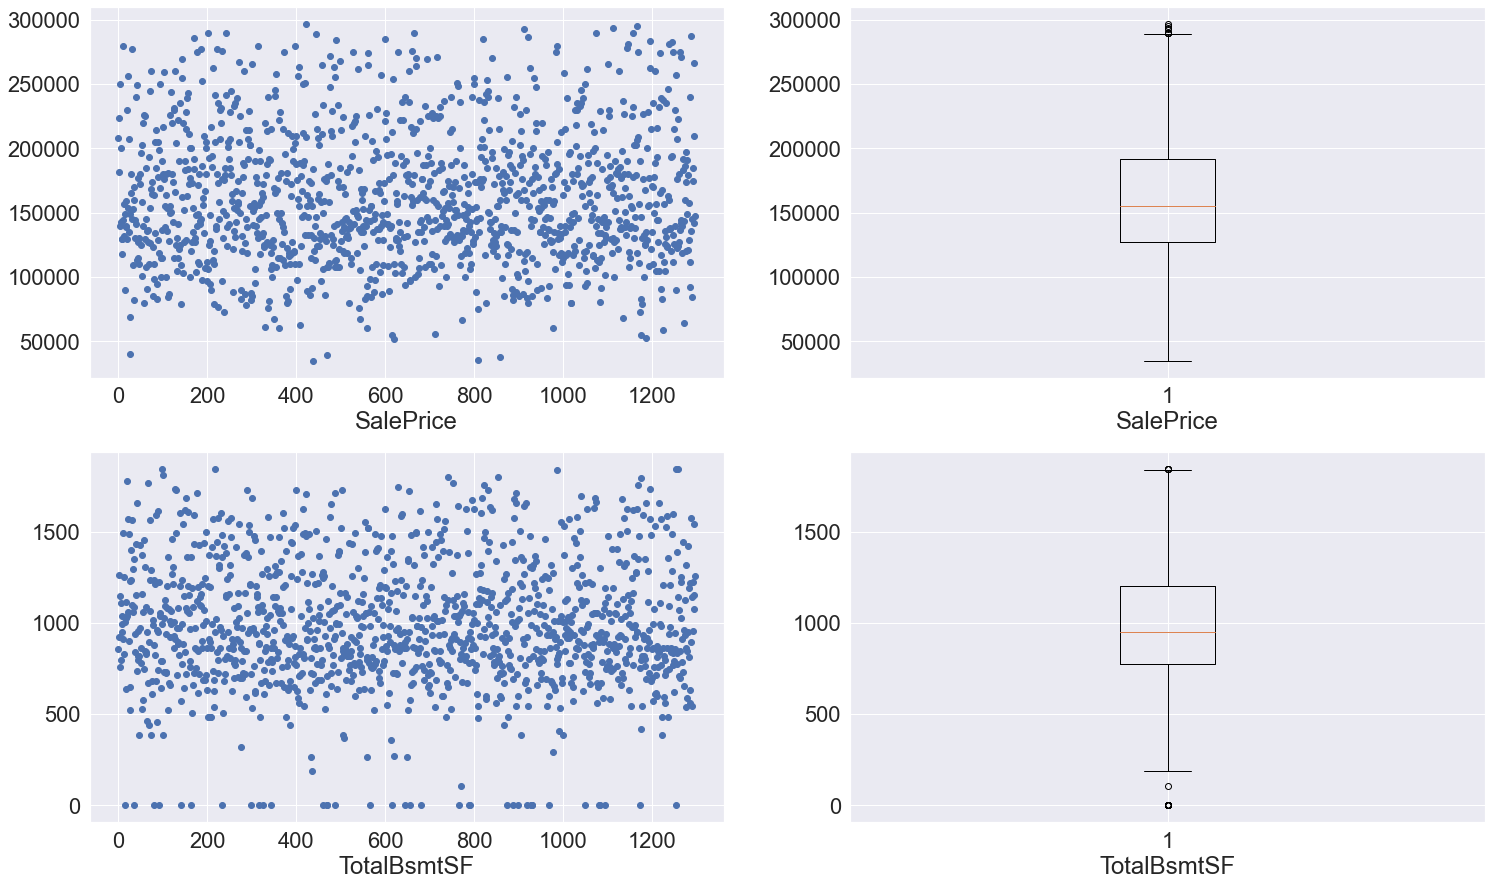

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1297 rows x 80 columns]

In [31]:
data_train = data_train.drop(data_train[((max_ < data_train['TotalBsmtSF'])) & ((data_train['TotalBsmtSF'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])
fig, aix = plt.subplots(nrows = 2, ncols = 2 ,figsize=(25,15))

aix[0,0].scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
aix[0,0].set_xlabel('SalePrice')
aix[0,1].boxplot(data_train['SalePrice'])
aix[0,1].set_xlabel('SalePrice')



aix[1,0].scatter(x = list(range(data_train['TotalBsmtSF'].size)),
                       y = data_train['TotalBsmtSF'].tolist())
aix[1,0].set_xlabel('TotalBsmtSF')
aix[1,1].boxplot(data_train['TotalBsmtSF'])
aix[1,1].set_xlabel('TotalBsmtSF')
plt.show()
data_train

Очистка 1stFlrSF

In [32]:
Q1 = q1(data_train['1stFlrSF'])
Q3 = q3(data_train['1stFlrSF'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('1stFlrSF Q1', Q1)
print('1stFlrSF Q3', Q3)
print('1stFlrSF IQR', IQR)
print('1stFlrSF min', min_)
print('1stFlrSF max', max_)

1stFlrSF Q1 864.0
1stFlrSF Q3 1297.0
1stFlrSF IQR 433.0
1stFlrSF min 214.5
1stFlrSF max 1946.5


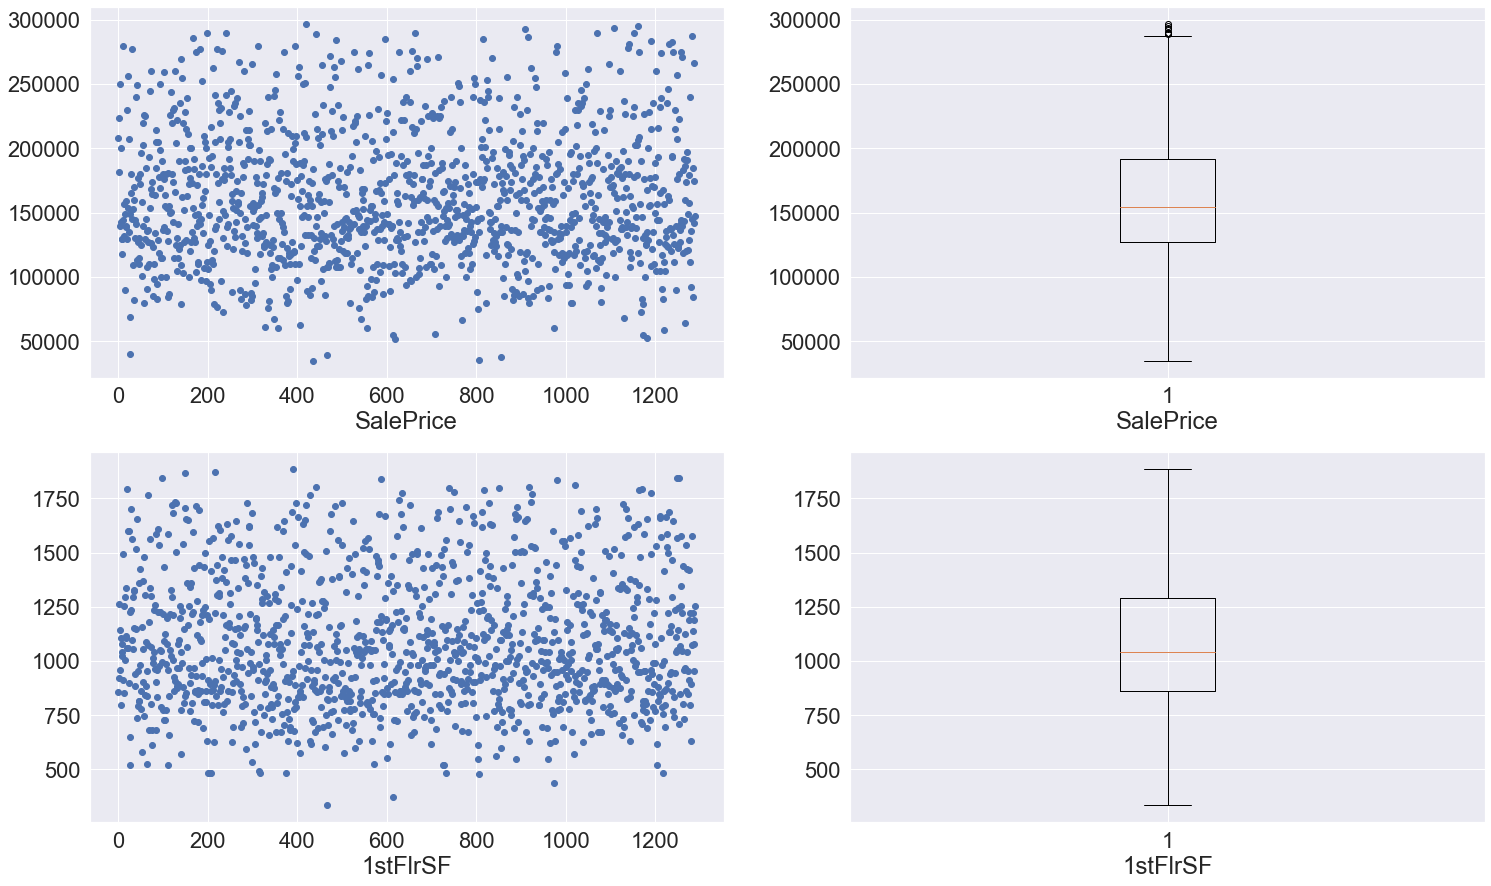

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454          20       FV         62.0     7500   Pave  Pave      Reg   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1454         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1454       0     10    2009        WD         Normal     185000  
1455       0      8    2007        WD         Normal     175000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1290 rows x 80 columns]

In [33]:
data_train = data_train.drop(data_train[((max_ < data_train['1stFlrSF'])) & ((data_train['1stFlrSF'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])
fig, aix = plt.subplots(nrows = 2, ncols = 2 ,figsize=(25,15))

aix[0,0].scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
aix[0,0].set_xlabel('SalePrice')
aix[0,1].boxplot(data_train['SalePrice'])
aix[0,1].set_xlabel('SalePrice')



aix[1,0].scatter(x = list(range(data_train['1stFlrSF'].size)),
                       y = data_train['1stFlrSF'].tolist())
aix[1,0].set_xlabel('1stFlrSF')
aix[1,1].boxplot(data_train['1stFlrSF'])
aix[1,1].set_xlabel('1stFlrSF')
plt.show()
data_train

Очистка TotRmsAbvGrd

In [34]:
Q1 = q1(data_train['TotRmsAbvGrd'])
Q3 = q3(data_train['TotRmsAbvGrd'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('TotRmsAbvGrd Q1', Q1)
print('TotRmsAbvGrd Q3', Q3)
print('TotRmsAbvGrd IQR', IQR)
print('TotRmsAbvGrd min', min_)
print('TotRmsAbvGrd max', max_)

TotRmsAbvGrd Q1 5.0
TotRmsAbvGrd Q3 7.0
TotRmsAbvGrd IQR 2.0
TotRmsAbvGrd min 2.0
TotRmsAbvGrd max 10.0


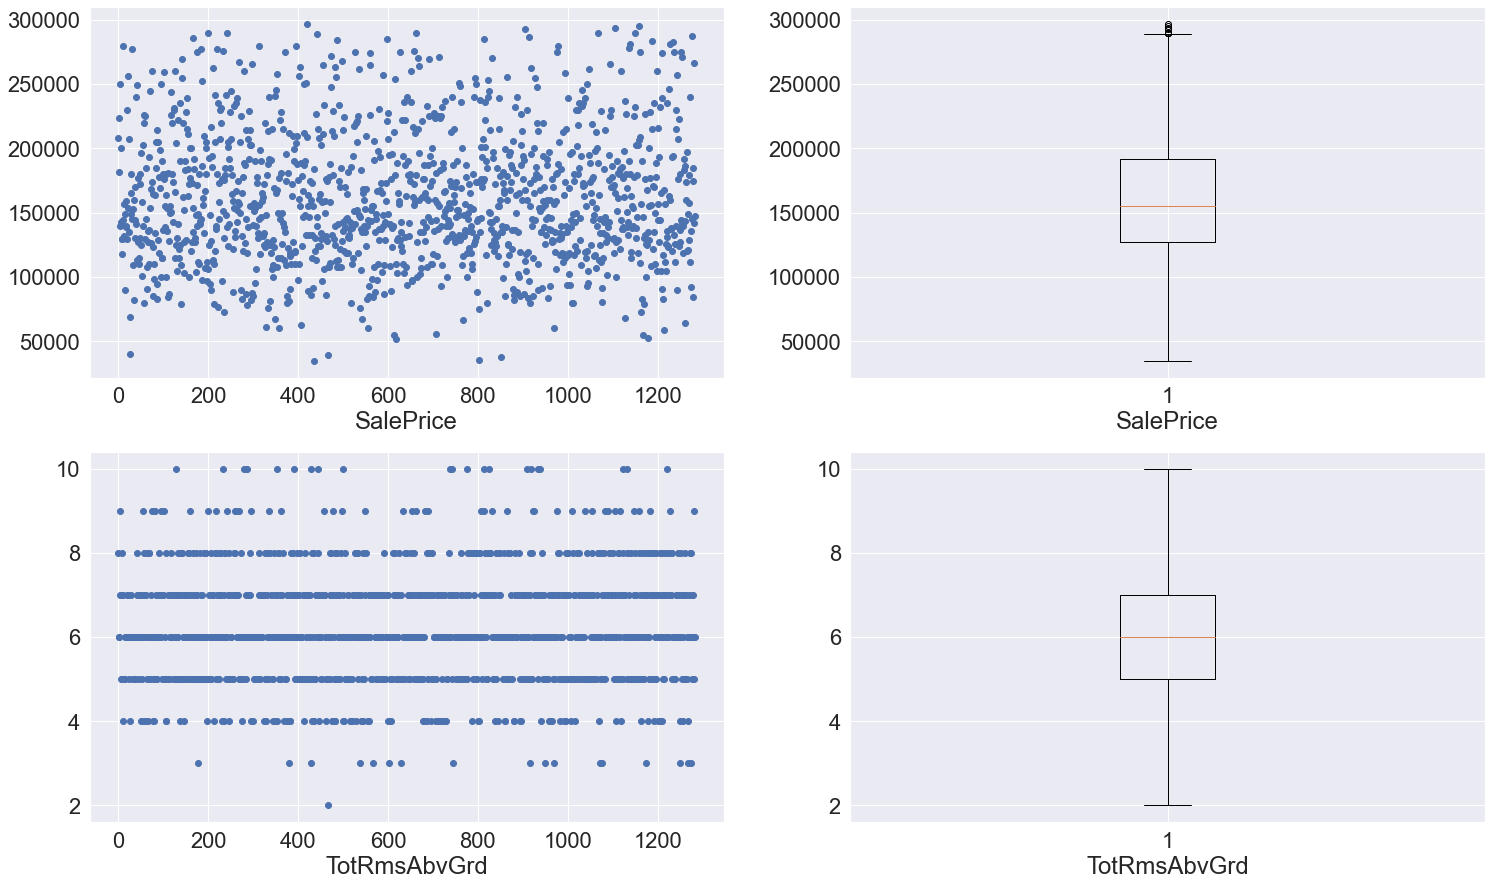

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454          20       FV         62.0     7500   Pave  Pave      Reg   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1454         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1454       0     10    2009        WD         Normal     185000  
1455       0      8    2007        WD         Normal     175000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1284 rows x 80 columns]

In [35]:
data_train = data_train.drop(data_train[((max_ < data_train['TotRmsAbvGrd'])) & ((data_train['TotRmsAbvGrd'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])
fig, aix = plt.subplots(nrows = 2, ncols = 2 ,figsize=(25,15))

aix[0,0].scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
aix[0,0].set_xlabel('SalePrice')
aix[0,1].boxplot(data_train['SalePrice'])
aix[0,1].set_xlabel('SalePrice')



aix[1,0].scatter(x = list(range(data_train['TotRmsAbvGrd'].size)),
                       y = data_train['TotRmsAbvGrd'].tolist())
aix[1,0].set_xlabel('TotRmsAbvGrd')
aix[1,1].boxplot(data_train['TotRmsAbvGrd'])
aix[1,1].set_xlabel('TotRmsAbvGrd')
plt.show()
data_train

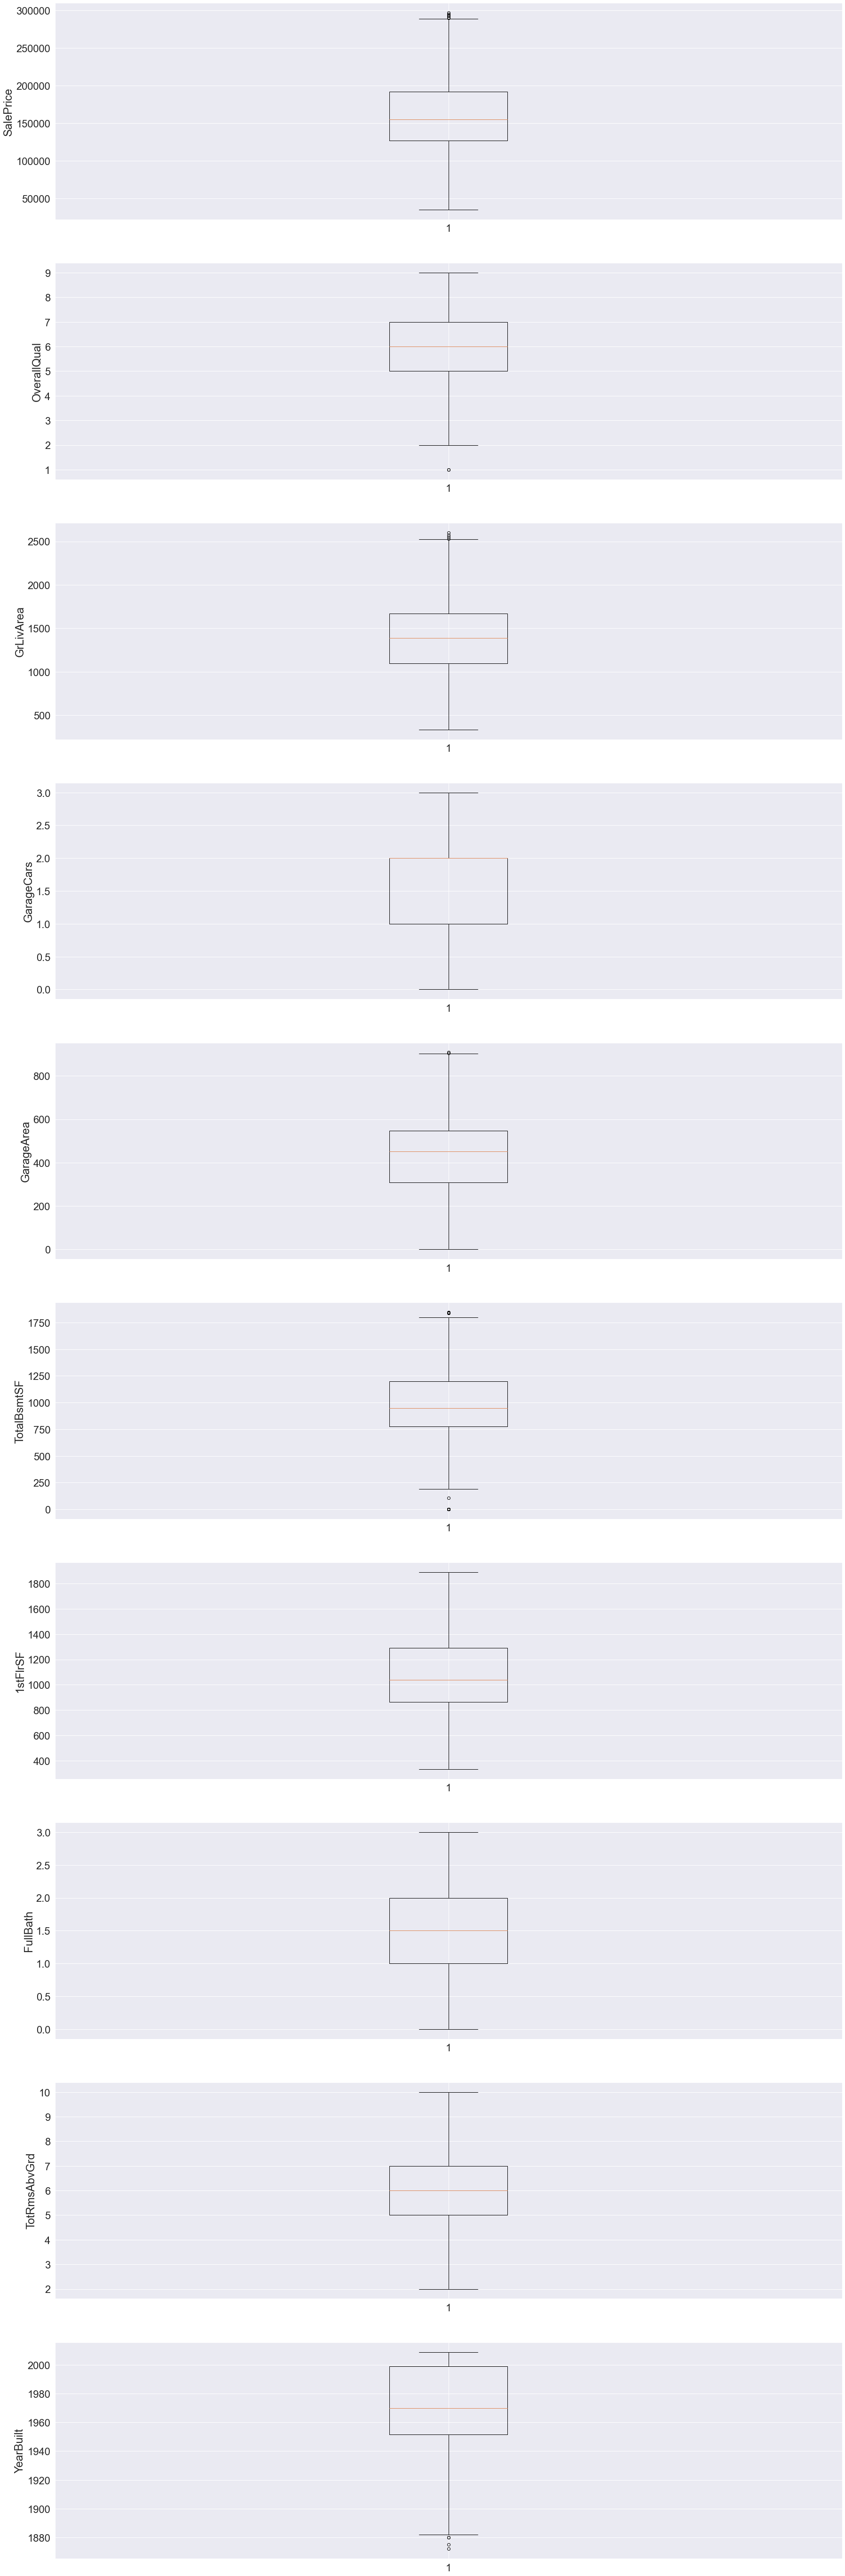

In [36]:
# fig, axs = plt.subplots(nrows = len(corrmat.nlargest(k, 'SalePrice').index)  , ncols= 1 ,figsize=(30,100))
# for ctn, i in enumerate(corrmat.nlargest(k, 'SalePrice').index):
#     axs[ctn].scatter(data_train['SalePrice'], data_train[i])
#     axs[ctn].set_xlabel('SalePrice')
#     axs[ctn].set_ylabel(i)

fig_1, axs_1 = plt.subplots(nrows = len(corrmat.nlargest(k, 'SalePrice').index)  , ncols= 1 ,figsize=(30,100))
for ctn, i in enumerate(corrmat.nlargest(k, 'SalePrice').index):
    axs_1[ctn].boxplot(data_train[i])
    axs_1[ctn].set_ylabel(i)

plt.show()

# Подготавливаем данные для обучения

In [54]:
list(data_train[corrmat.nlargest(k, 'SalePrice').index].columns)

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [55]:
data_for_fit = data_train[corrmat.nlargest(k, 'SalePrice').index]

In [56]:
# Проверяем на наличие отсутствующих значений
data_for_fit.isnull().value_counts()

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt
False      False        False      False       False       False        False     False     False         False        1279
dtype: int64

In [57]:
# Отделяем значения для обучения модели
test_size = 0.3
train_size = 0.7
random_state = 42

train, test= train_test_split(data_for_fit, 
                              test_size = test_size, 
                              train_size = train_size,
                              random_state = random_state)   
train_X = train.drop('SalePrice', axis = 1)
train_Y = train['SalePrice']
test_X = test.drop('SalePrice', axis = 1)
test_Y = test['SalePrice']

In [58]:
train_X = tf.convert_to_tensor(train_X)

In [59]:
train_X

<tf.Tensor: shape=(895, 9), dtype=int64, numpy=
array([[   5, 1040,    2, ...,    2,    5, 1977],
       [   5, 1792,    0, ...,    2,    8, 1974],
       [   5, 1134,    1, ...,    1,    6, 1960],
       ...,
       [   6, 2447,    1, ...,    2,   10, 1919],
       [   4,  894,    2, ...,    1,    5, 1954],
       [   7, 1573,    2, ...,    2,    6, 2002]], dtype=int64)>

In [60]:
train_Y = tf.convert_to_tensor(train_Y)

In [61]:
test_X = tf.convert_to_tensor(test_X)

In [62]:
test_Y = tf.convert_to_tensor(test_Y)

In [66]:
# Parameters 
batch_size = 20 
display_step = 1
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)
epochs = 300
activation = 'ELU'
loss=tf.keras.losses.MeanAbsolutePercentageError()
# loss = tf.losses.MeanAbsoluteError()

# Создаем слой нормализации входных данных
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_X))
print('Значения для нормализации: ', normalizer.mean.numpy())


model = tf.keras.models.Sequential()
model.add(normalizer)
model.add(tf.keras.Input(shape=(9,)))
model.add(tf.keras.layers.Dense(32, activation=activation))
model.add(tf.keras.layers.Dense(64, activation=activation))
model.add(tf.keras.layers.Dense(128, activation=activation))
model.add(tf.keras.layers.Dense(256, activation=activation))
model.add(tf.keras.layers.Dense(512, activation=activation))
model.add(tf.keras.layers.Dense(1024, activation=activation))
model.add(tf.keras.layers.Dense(2048, activation=activation))
model.add(tf.keras.layers.Dense(512, activation=activation))
model.add(tf.keras.layers.Dense(256, activation=activation))
model.add(tf.keras.layers.Dense(128, activation=activation))
model.add(tf.keras.layers.Dense(64, activation=activation))
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.summary()
model.compile(optimizer = adam, loss=loss)

Значения для нормализации:  [[5.8871508e+00 1.4011901e+03 1.6581007e+00 4.3729492e+02 9.7949713e+02
  1.0903463e+03 1.5005587e+00 6.2312841e+00 1.9696248e+03]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense_12 (Dense)            (None, 32)                320       
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                          

In [67]:
model_fit = model.fit(x = train_X, y = train_Y, epochs=epochs, batch_size = batch_size,validation_data = (test_X, test_Y))

Epoch 1/300
45/45 [==============================] - 4s 54ms/step - loss: 99.9996 - val_loss: 99.9989
Epoch 2/300
45/45 [==============================] - 2s 49ms/step - loss: 99.9981 - val_loss: 99.9970
Epoch 3/300
45/45 [==============================] - 2s 50ms/step - loss: 99.9954 - val_loss: 99.9931
Epoch 4/300
45/45 [==============================] - 2s 49ms/step - loss: 99.9899 - val_loss: 99.9851
Epoch 5/300
45/45 [==============================] - 2s 49ms/step - loss: 99.9774 - val_loss: 99.9655
Epoch 6/300
45/45 [==============================] - 2s 50ms/step - loss: 99.9436 - val_loss: 99.9083
Epoch 7/300
45/45 [==============================] - 2s 51ms/step - loss: 99.8451 - val_loss: 99.7399
Epoch 8/300
45/45 [==============================] - 2s 49ms/step - loss: 99.5692 - val_loss: 99.2799
Epoch 9/300
45/45 [==============================] - 2s 49ms/step - loss: 98.8402 - val_loss: 98.1001
Epoch 10/300
45/45 [==============================] - 2s 50ms/step - loss: 97.0495

45/45 [==============================] - 2s 49ms/step - loss: 14.4177 - val_loss: 14.6169
Epoch 160/300
45/45 [==============================] - 2s 49ms/step - loss: 14.3672 - val_loss: 14.6058
Epoch 161/300
45/45 [==============================] - 2s 49ms/step - loss: 14.3191 - val_loss: 14.6313
Epoch 162/300
45/45 [==============================] - 2s 49ms/step - loss: 14.3135 - val_loss: 14.6678
Epoch 163/300
45/45 [==============================] - 2s 49ms/step - loss: 14.2517 - val_loss: 14.5716
Epoch 164/300
45/45 [==============================] - 2s 50ms/step - loss: 14.1930 - val_loss: 14.5577
Epoch 165/300
45/45 [==============================] - 2s 50ms/step - loss: 14.1658 - val_loss: 14.5325
Epoch 166/300
45/45 [==============================] - 2s 49ms/step - loss: 14.1091 - val_loss: 14.5296
Epoch 167/300
45/45 [==============================] - 2s 51ms/step - loss: 14.0915 - val_loss: 14.5360
Epoch 168/300
45/45 [==============================] - 2s 52ms/step - loss: 14

KeyboardInterrupt: 

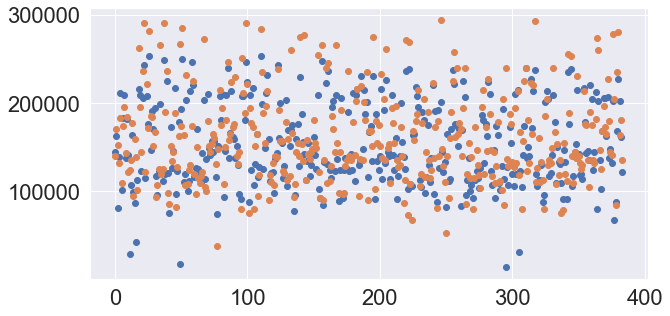

Mean squared error:  1261610395.9514525
Mean absolute error:  22944.42398071289
Coefficient of determination:  0.5203229965758329
Mean absolute percentage error:  14.484387992553074 %
Mean squared log error:  0.0923935352505314
Root Mean Squared Log Error:  0.3039630491532341


In [68]:
temp = []
for i in model(test_X).numpy().tolist():
    temp.append(i)
    
plt.figure(figsize=(10,5))
plt.scatter(x = list(range(len(temp))), y = temp)
plt.scatter(x = list(range(len(test_Y.numpy().tolist()))), y = test_Y.numpy().tolist())
plt.show()

mse = mean_squared_error(test_Y.numpy().tolist(), temp)
print('Mean squared error: ', mse)
mae = mean_absolute_error(test_Y.numpy().tolist(), temp)
print('Mean absolute error: ', mae)
r2 = r2_score(test_Y.numpy().tolist(), temp)
print('Coefficient of determination: ', r2)
mape = mean_absolute_percentage_error(test_Y.numpy().tolist(), temp)
print('Mean absolute percentage error: ', mape*100,'%')
msle = mean_squared_log_error(test_Y.numpy().tolist(), temp)
print('Mean squared log error: ', msle)
rmsle = np.sqrt(msle)
print('Root Mean Squared Log Error: ', rmsle)

In [258]:
# test_Y.numpy().tolist()

In [111]:
# # Функция преобразования категориальных значений в цифровые
# def ConvertCatToNum(data):
#     data_ = data
#     if(data.dtypes[data.dtypes == 'O'].count() == 0):
#         return data
#     if(data.dtypes[data.dtypes == 'O'].count() > 0):
#         index = data.dtypes[data.dtypes == 'O'].index.tolist()
#         for i in index:
# #             futurs = 
# #             futurs = pd.get_dummies(data[i]).reset_index(drop=True)
#             data_ = pd.concat([data_,
#                    pd.get_dummies(data_[i]).reset_index(drop=True)],
#                   axis = 1)
#             data_ = data_.drop(i,axis=1)
#         return data_

In [40]:
data_train.dtypes[data_train.dtypes == 'O']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [104]:
futurs = data_train

In [97]:
futurs

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454          20       FV         62.0     7500   Pave  Pave      Reg   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1454         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1454       0     10    2009        WD         Normal     185000  
1455       0      8    2007        WD         Normal     175000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1284 rows x 80 columns]

In [98]:
futurs['MSZoning'].value_counts()

RL         1000
RM          206
FV           55
RH           14
C (all)       9
Name: MSZoning, dtype: int64

In [99]:
futurs = pd.concat([futurs,
                   pd.get_dummies(futurs['MSZoning']).reset_index(drop=True)],
                  axis = 1)

In [100]:
futurs

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           60.0       RL         65.0   8450.0   Pave   NaN      Reg   
1           20.0       RL         80.0   9600.0   Pave   NaN      Reg   
2           60.0       RL         68.0  11250.0   Pave   NaN      IR1   
3           70.0       RL         60.0   9550.0   Pave   NaN      IR1   
4           60.0       RL         84.0  14260.0   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454        20.0       FV         62.0   7500.0   Pave  Pave      Reg   
1455        60.0       RL         62.0   7917.0   Pave   NaN      Reg   
1457        70.0       RL         66.0   9042.0   Pave   NaN      Reg   
1458        20.0       RL         68.0   9717.0   Pave   NaN      Reg   
1459        20.0       RL         75.0   9937.0   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... MoSold  YrSold SaleType  \
0            Lvl    AllPub    Inside  ...    2.0  2008.0       WD   
1            Lvl    AllPub       FR2  ...    5.0  2007.0       WD   
2            Lvl    AllPub    Inside  ...    9.0  2008.0       WD   
3            Lvl    AllPub    Corner  ...    2.0  2006.0       WD   
4            Lvl    AllPub       FR2  ...   12.0  2008.0       WD   
...          ...       ...       ...  ...    ...     ...      ...   
1454         Lvl    AllPub    Inside  ...   10.0  2009.0       WD   
1455         Lvl    AllPub    Inside  ...    8.0  2007.0       WD   
1457         Lvl    AllPub    Inside  ...    5.0  2010.0       WD   
1458         Lvl    AllPub    Inside  ...    4.0  2010.0       WD   
1459         Lvl    AllPub    Inside  ...    6.0  2008.0       WD   

     SaleCondition SalePrice C (all)   FV   RH   RL   RM  
0           Normal  208500.0     0.0  0.0  0.0  1.0  0.0  
1           Normal  181500.0     0.0  0.0  0.0  1.0  0.0  
2           Normal  223500.0     0.0  0.0  0.0  1.0  0.0  
3          Abnorml  140000.0     0.0  0.0  0.0  1.0  0.0  
4           Normal  250000.0     0.0  0.0  0.0  1.0  0.0  
...            ...       ...     ...  ...  ...  ...  ...  
1454        Normal  185000.0     NaN  NaN  NaN  NaN  NaN  
1455        Normal  175000.0     NaN  NaN  NaN  NaN  NaN  
1457        Normal  266500.0     NaN  NaN  NaN  NaN  NaN  
1458        Normal  142125.0     NaN  NaN  NaN  NaN  NaN  
1459        Normal  147500.0     NaN  NaN  NaN  NaN  NaN  

[1435 rows x 85 columns]

In [101]:
futurs = pd.concat([futurs,
                   pd.get_dummies(futurs['Street']).reset_index(drop=True)],
                  axis = 1)

In [102]:
futurs

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           60.0       RL         65.0   8450.0   Pave   NaN      Reg   
1           20.0       RL         80.0   9600.0   Pave   NaN      Reg   
2           60.0       RL         68.0  11250.0   Pave   NaN      IR1   
3           70.0       RL         60.0   9550.0   Pave   NaN      IR1   
4           60.0       RL         84.0  14260.0   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454        20.0       FV         62.0   7500.0   Pave  Pave      Reg   
1455        60.0       RL         62.0   7917.0   Pave   NaN      Reg   
1457        70.0       RL         66.0   9042.0   Pave   NaN      Reg   
1458        20.0       RL         68.0   9717.0   Pave   NaN      Reg   
1459        20.0       RL         75.0   9937.0   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... SaleType SaleCondition SalePrice  \
0            Lvl    AllPub    Inside  ...       WD        Normal  208500.0   
1            Lvl    AllPub       FR2  ...       WD        Normal  181500.0   
2            Lvl    AllPub    Inside  ...       WD        Normal  223500.0   
3            Lvl    AllPub    Corner  ...       WD       Abnorml  140000.0   
4            Lvl    AllPub       FR2  ...       WD        Normal  250000.0   
...          ...       ...       ...  ...      ...           ...       ...   
1454         Lvl    AllPub    Inside  ...       WD        Normal  185000.0   
1455         Lvl    AllPub    Inside  ...       WD        Normal  175000.0   
1457         Lvl    AllPub    Inside  ...       WD        Normal  266500.0   
1458         Lvl    AllPub    Inside  ...       WD        Normal  142125.0   
1459         Lvl    AllPub    Inside  ...       WD        Normal  147500.0   

     C (all)   FV   RH   RL   RM  Grvl  Pave  
0        0.0  0.0  0.0  1.0  0.0   0.0   1.0  
1        0.0  0.0  0.0  1.0  0.0   0.0   1.0  
2        0.0  0.0  0.0  1.0  0.0   0.0   1.0  
3        0.0  0.0  0.0  1.0  0.0   0.0   1.0  
4        0.0  0.0  0.0  1.0  0.0   0.0   1.0  
...      ...  ...  ...  ...  ...   ...   ...  
1454     NaN  NaN  NaN  NaN  NaN   NaN   NaN  
1455     NaN  NaN  NaN  NaN  NaN   NaN   NaN  
1457     NaN  NaN  NaN  NaN  NaN   NaN   NaN  
1458     NaN  NaN  NaN  NaN  NaN   NaN   NaN  
1459     NaN  NaN  NaN  NaN  NaN   NaN   NaN  

[1455 rows x 87 columns]

In [105]:
pd.get_dummies(futurs['Street']).reset_index(drop=True)

Grvl  Pave
0        0     1
1        0     1
2        0     1
3        0     1
4        0     1
...    ...   ...
1279     0     1
1280     0     1
1281     0     1
1282     0     1
1283     0     1

[1284 rows x 2 columns]

In [107]:
futurs.reset_index(drop= True , inplace= True )


In [109]:
futurs = pd.concat([futurs,
                   pd.get_dummies(futurs['Street']).reset_index(drop=True)],
                  axis = 1)

In [110]:
futurs

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1279          20       FV         62.0     7500   Pave  Pave      Reg   
1280          60       RL         62.0     7917   Pave   NaN      Reg   
1281          70       RL         66.0     9042   Pave   NaN      Reg   
1282          20       RL         68.0     9717   Pave   NaN      Reg   
1283          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ...  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub    Inside  ...    NaN         NaN       0      2   
1            Lvl    AllPub       FR2  ...    NaN         NaN       0      5   
2            Lvl    AllPub    Inside  ...    NaN         NaN       0      9   
3            Lvl    AllPub    Corner  ...    NaN         NaN       0      2   
4            Lvl    AllPub       FR2  ...    NaN         NaN       0     12   
...          ...       ...       ...  ...    ...         ...     ...    ...   
1279         Lvl    AllPub    Inside  ...    NaN         NaN       0     10   
1280         Lvl    AllPub    Inside  ...    NaN         NaN       0      8   
1281         Lvl    AllPub    Inside  ...  GdPrv        Shed    2500      5   
1282         Lvl    AllPub    Inside  ...    NaN         NaN       0      4   
1283         Lvl    AllPub    Inside  ...    NaN         NaN       0      6   

     YrSold SaleType  SaleCondition  SalePrice  Grvl  Pave  
0      2008       WD         Normal     208500     0     1  
1      2007       WD         Normal     181500     0     1  
2      2008       WD         Normal     223500     0     1  
3      2006       WD        Abnorml     140000     0     1  
4      2008       WD         Normal     250000     0     1  
...     ...      ...            ...        ...   ...   ...  
1279   2009       WD         Normal     185000     0     1  
1280   2007       WD         Normal     175000     0     1  
1281   2010       WD         Normal     266500     0     1  
1282   2010       WD         Normal     142125     0     1  
1283   2008       WD         Normal     147500     0     1  

[1284 rows x 82 columns]

In [115]:
print(data_train[data_train['MSZoning']=='RL']['SalePrice'].mean())
print(data_train[data_train['MSZoning']=='RM']['SalePrice'].mean())
print(data_train[data_train['MSZoning']=='FV']['SalePrice'].mean())
print(data_train[data_train['MSZoning']=='RH']['SalePrice'].mean())
print(data_train[data_train['MSZoning']=='C (all)']['SalePrice'].mean())
print(data_train[data_train['MSZoning']=='NaN']['SalePrice'].mean())

169477.43618090454
119976.16504854368
197816.52727272728
125781.0
73808.88888888889
nan


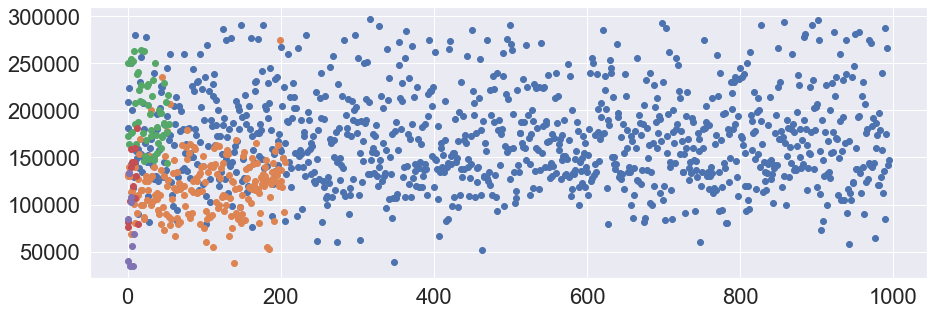

In [107]:
plt.figure(figsize=(15,5))
plt.scatter(list(range(len(data_train[data_train['MSZoning']=='RL']['SalePrice']))),data_train[data_train['MSZoning']=='RL']['SalePrice'])
plt.scatter(list(range(len(data_train[data_train['MSZoning']=='RM']['SalePrice']))),data_train[data_train['MSZoning']=='RM']['SalePrice'])
plt.scatter(list(range(len(data_train[data_train['MSZoning']=='FV']['SalePrice']))),data_train[data_train['MSZoning']=='FV']['SalePrice'])
plt.scatter(list(range(len(data_train[data_train['MSZoning']=='RH']['SalePrice']))),data_train[data_train['MSZoning']=='RH']['SalePrice'])
plt.scatter(list(range(len(data_train[data_train['MSZoning']=='C (all)']['SalePrice']))),data_train[data_train['MSZoning']=='C (all)']['SalePrice'])
plt.scatter(list(range(len(data_train[data_train['MSZoning']=='NaN']['SalePrice']))),data_train[data_train['MSZoning']=='NaN']['SalePrice'])
plt.show()

In [89]:
for i  in data_train.dtypes[data_train.dtypes == 'O'].index.tolist():
    print('Was ', data_train[i].value_counts(), 'stay: ', )

Was  RL         995
RM         206
FV          55
RH          14
C (all)      9
Name: MSZoning, dtype: int64 stay: 
Was  Pave    1275
Grvl       4
Name: Street, dtype: int64 stay: 
Was  Grvl    48
Pave    39
Name: Alley, dtype: int64 stay: 
Was  Reg    830
IR1    409
IR2     32
IR3      8
Name: LotShape, dtype: int64 stay: 
Was  Lvl    1157
Bnk      56
HLS      38
Low      28
Name: LandContour, dtype: int64 stay: 
Was  AllPub    1278
NoSeWa       1
Name: Utilities, dtype: int64 stay: 
Was  Inside     929
Corner     224
CulDSac     79
FR2         44
FR3          3
Name: LotConfig, dtype: int64 stay: 
Was  Gtl    1217
Mod      51
Sev      11
Name: LandSlope, dtype: int64 stay: 
Was  NAmes      212
CollgCr    145
OldTown    103
Edwards     96
Gilbert     77
Sawyer      73
Somerst     71
NWAmes      63
BrkSide     58
SawyerW     52
Mitchel     46
Crawfor     39
IDOTRR      35
NridgHt     31
Timber      28
ClearCr     25
SWISU       23
NoRidge     18
Blmngtn     17
MeadowV     17
BrDale    

In [ ]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)